<img src="https://images.unsplash.com/flagged/photo-1584036561584-b03c19da874c?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=889&q=80" alt="Covid-19 Image" width="900" height="300" >

**Table of content**
<a id="0"></a>
* [1.Importing Important Libraries and Dataset](#1)
* [2. Overview of the dataset](#2)
* [3. Unique values in all columns](#3)
    * [Regression Plot](#31)
* [4. StripPlot of the columns values](#4)
* [5. BarPlot of the columns values](#5)
* [6. BarPlot of the ratio% columns values](#6)
* [7. HeatMap of the dataset](#7)
* [8. Model training using pycaret](#8)
* [9. Prediction of trained model on holdout data ](#9)
* [10. Message for readers](#10)

<a id="1"></a>
# **1.Importing Important Libraries and Dataset**

* [Jump to top](#0)

In [127]:
# import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import LeaveOneOut, train_test_split


# setting up options
pd.set_option('display.max_rows', 69)
pd.set_option('display.max_columns', 40)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

%matplotlib inline

In [128]:
df = pd.read_csv('../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')
print('csv file loaded')

csv file loaded


# **2.Overview of the Dataset**
<a id = '2'></a>
* [Jump to top](#0)

In [129]:
print(f'''dataframe shape: Rows: {df.shape[0]}, Columns: {df.shape[1]}
dataframe sumed null values: {df.isnull().sum().sum()}
dataframe columns name: ↴↴
                        ↴↴
                        ↴↴
{df.columns.values}
''')

dataframe shape: Rows: 36, Columns: 8
dataframe sumed null values: 0
dataframe columns name: ↴↴
                        ↴↴
                        ↴↴
['State/UTs' 'Total Cases' 'Active' 'Discharged' 'Deaths'
 'Active Ratio (%)' 'Discharge Ratio (%)' 'Death Ratio (%)']



In [130]:
df.style.background_gradient(cmap="Wistia",text_color_threshold=0.01)

In [131]:
df.describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


# **3.Unique Values in all columns**
<a id = '3'> </a>
* [Jump to top](#0)

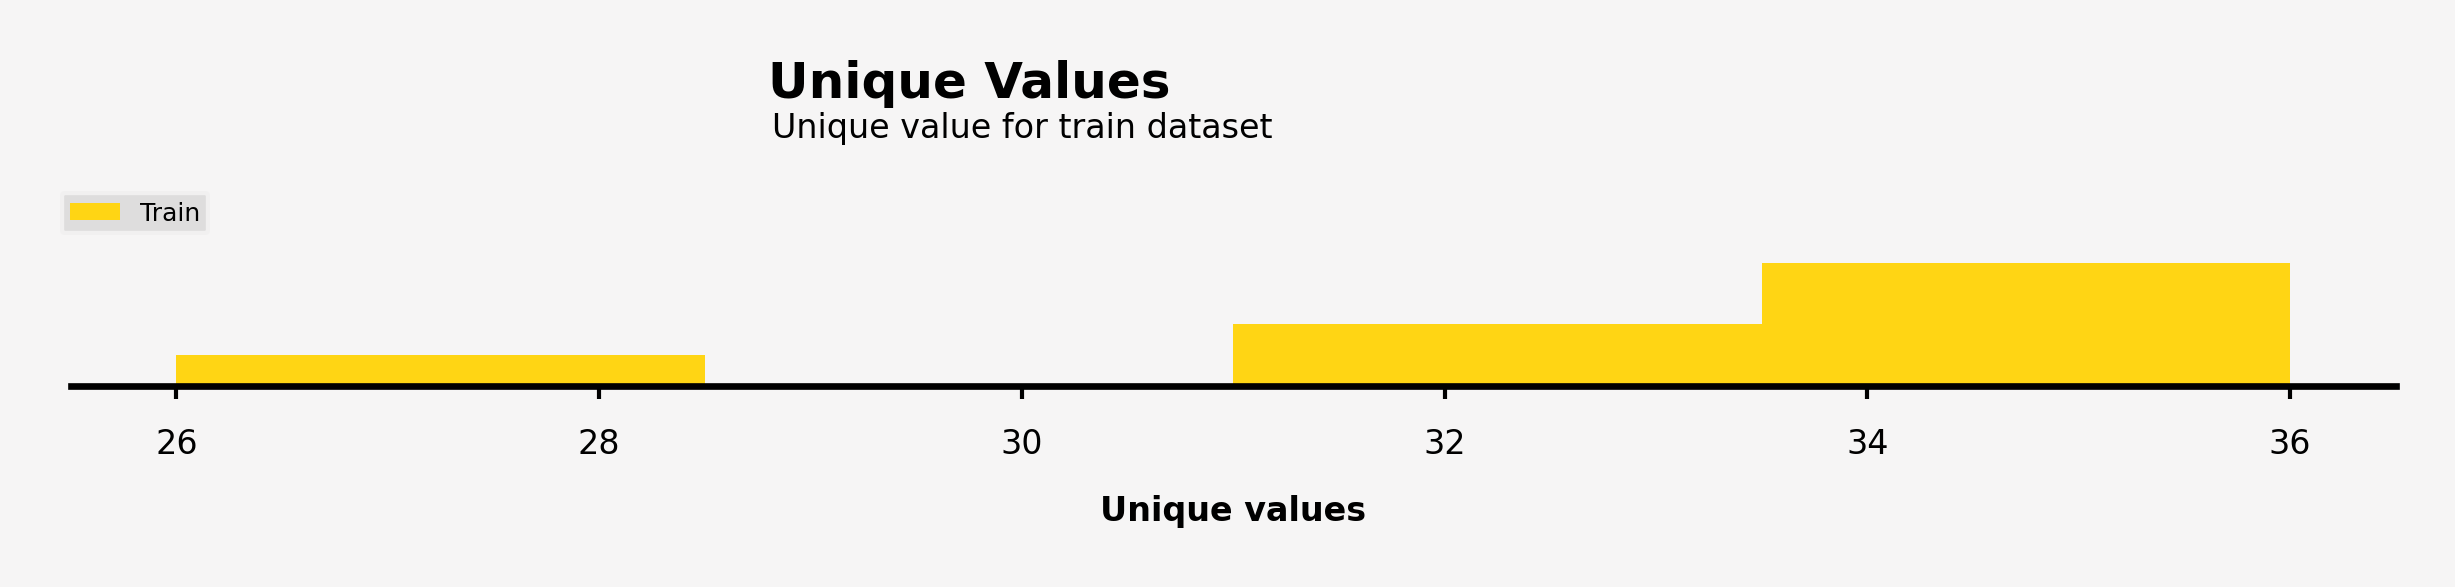

In [133]:
#unique values in dataframe

features = [feature for feature in df.columns if feature not in ['id','State/UTs']]

unique_values_train = np.zeros(2)
for feature in features:
    temp = df[feature].unique()
    unique_values_train = np.concatenate([unique_values_train, temp])
unique_values_train = np.unique(unique_values_train)

unique_value_feature_train = pd.DataFrame(df[features].nunique())
unique_value_feature_train = unique_value_feature_train.reset_index(drop=False)
unique_value_feature_train.columns = ['Features', 'Count']
####################################################################################
####################################################################################
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514'])

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top", "left"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0_sns = sns.histplot(ax=ax0, x=unique_value_feature_train['Count'], zorder=2, linewidth=0, alpha=1)
ax0_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.get_yaxis().set_visible(False)

ax0.text(28.8, 10.6, 'Unique Values', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(28.82, 8.9, 'Unique value for train dataset', fontsize=4, ha='left', va='top')
ax0_sns.legend(['Train', 'Test'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.6), loc='upper left')

plt.show()

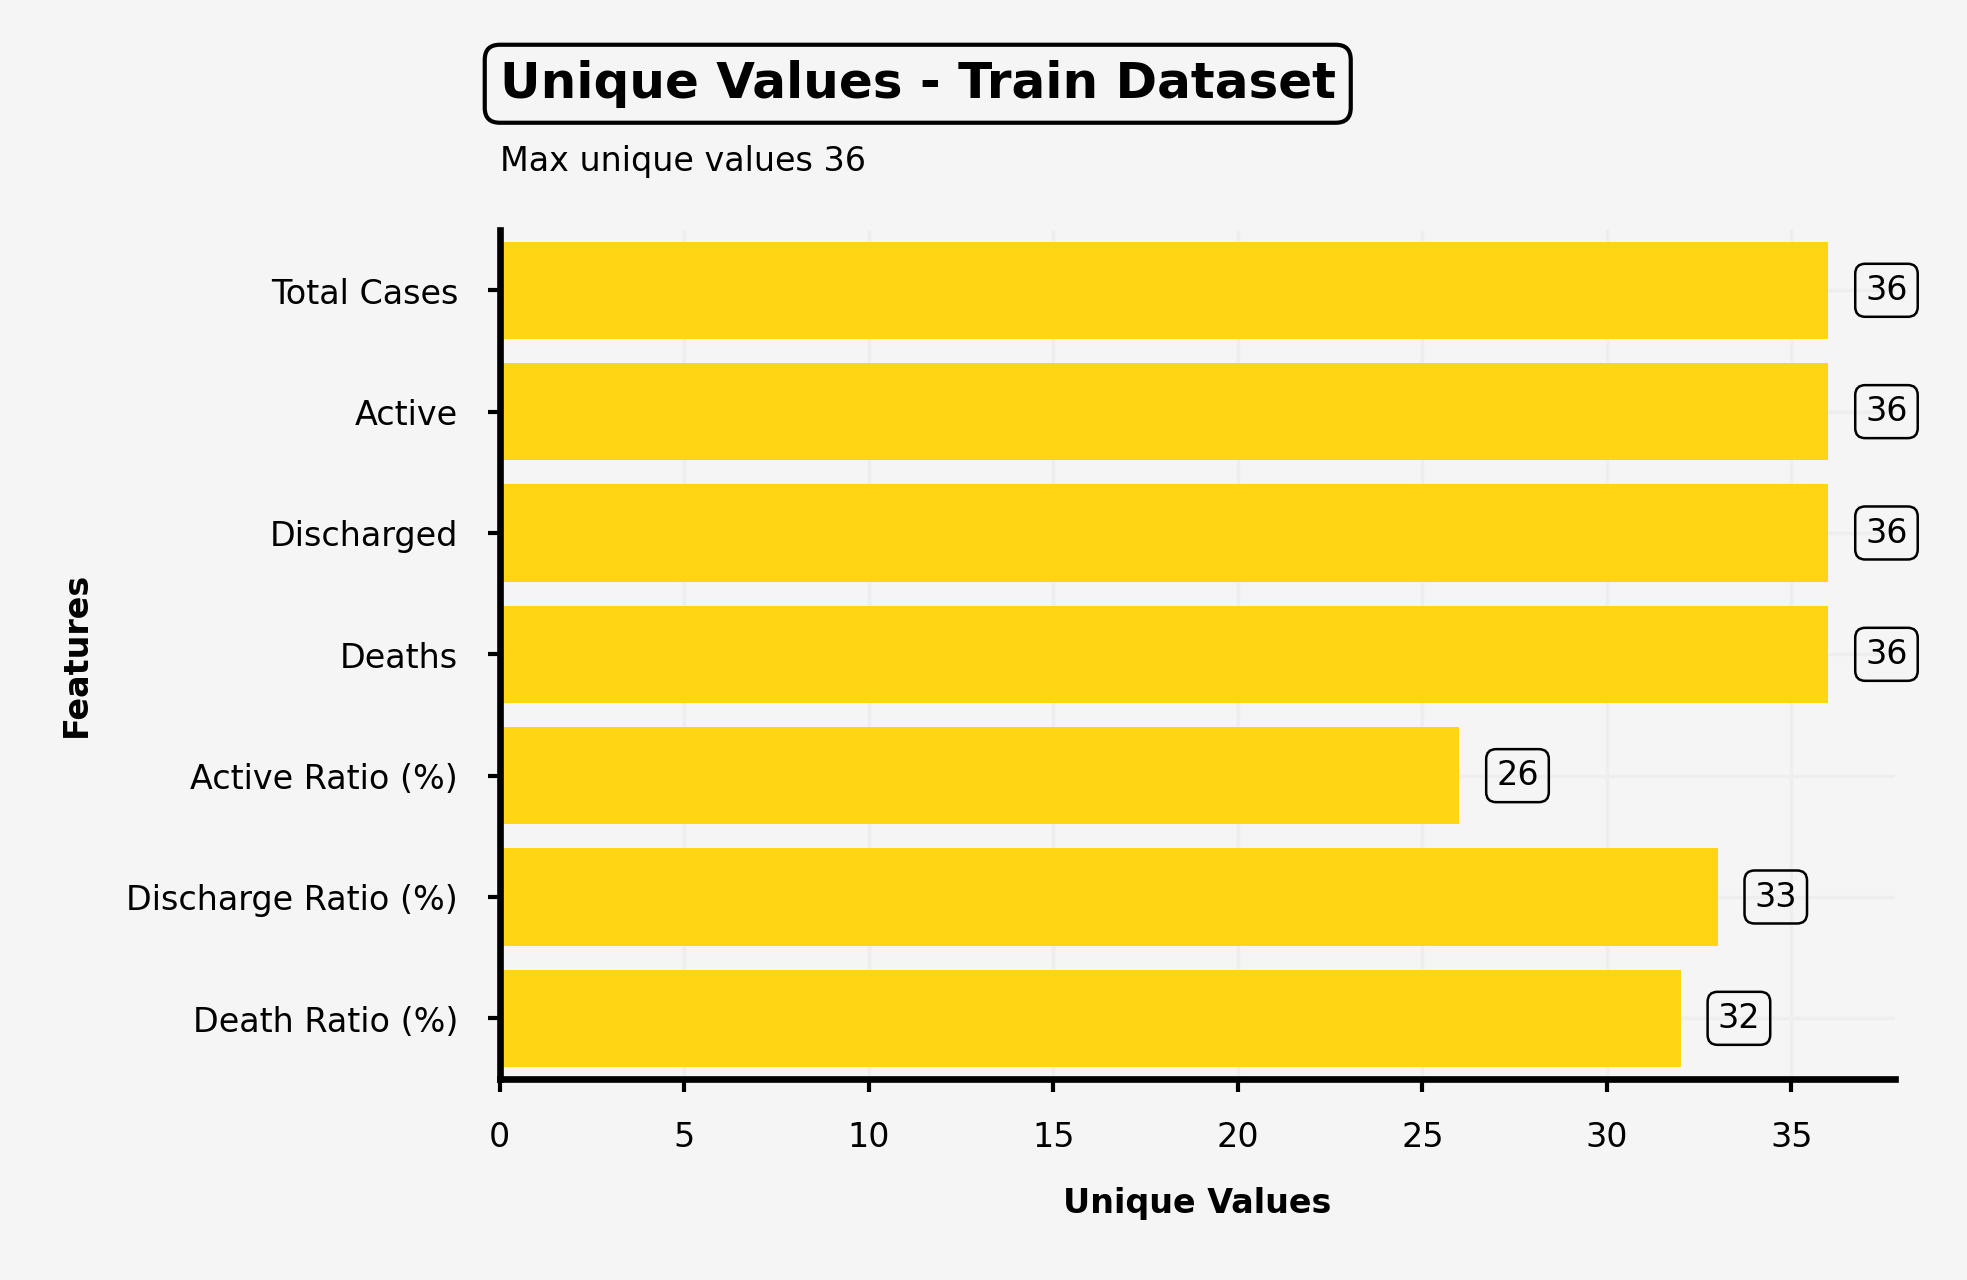

In [134]:
#unique values in dataframe

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*75)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_value_feature_train['Features'], x=unique_value_feature_train['Count'],
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax0.text(0, -1.2, 'Max unique values 36', fontsize=4, ha='left', va='top')
# data label
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax0.set_anchor('C')  

plt.show()

# **4.Strip Plot of Columns Values**
<a id = '4'> </a>
* [Jump to top](#0)

In [135]:
df['State/UTs'] = df['State/UTs'].str.replace('Dadra and Nagar Haveli and Daman and Diu','daman and diu')

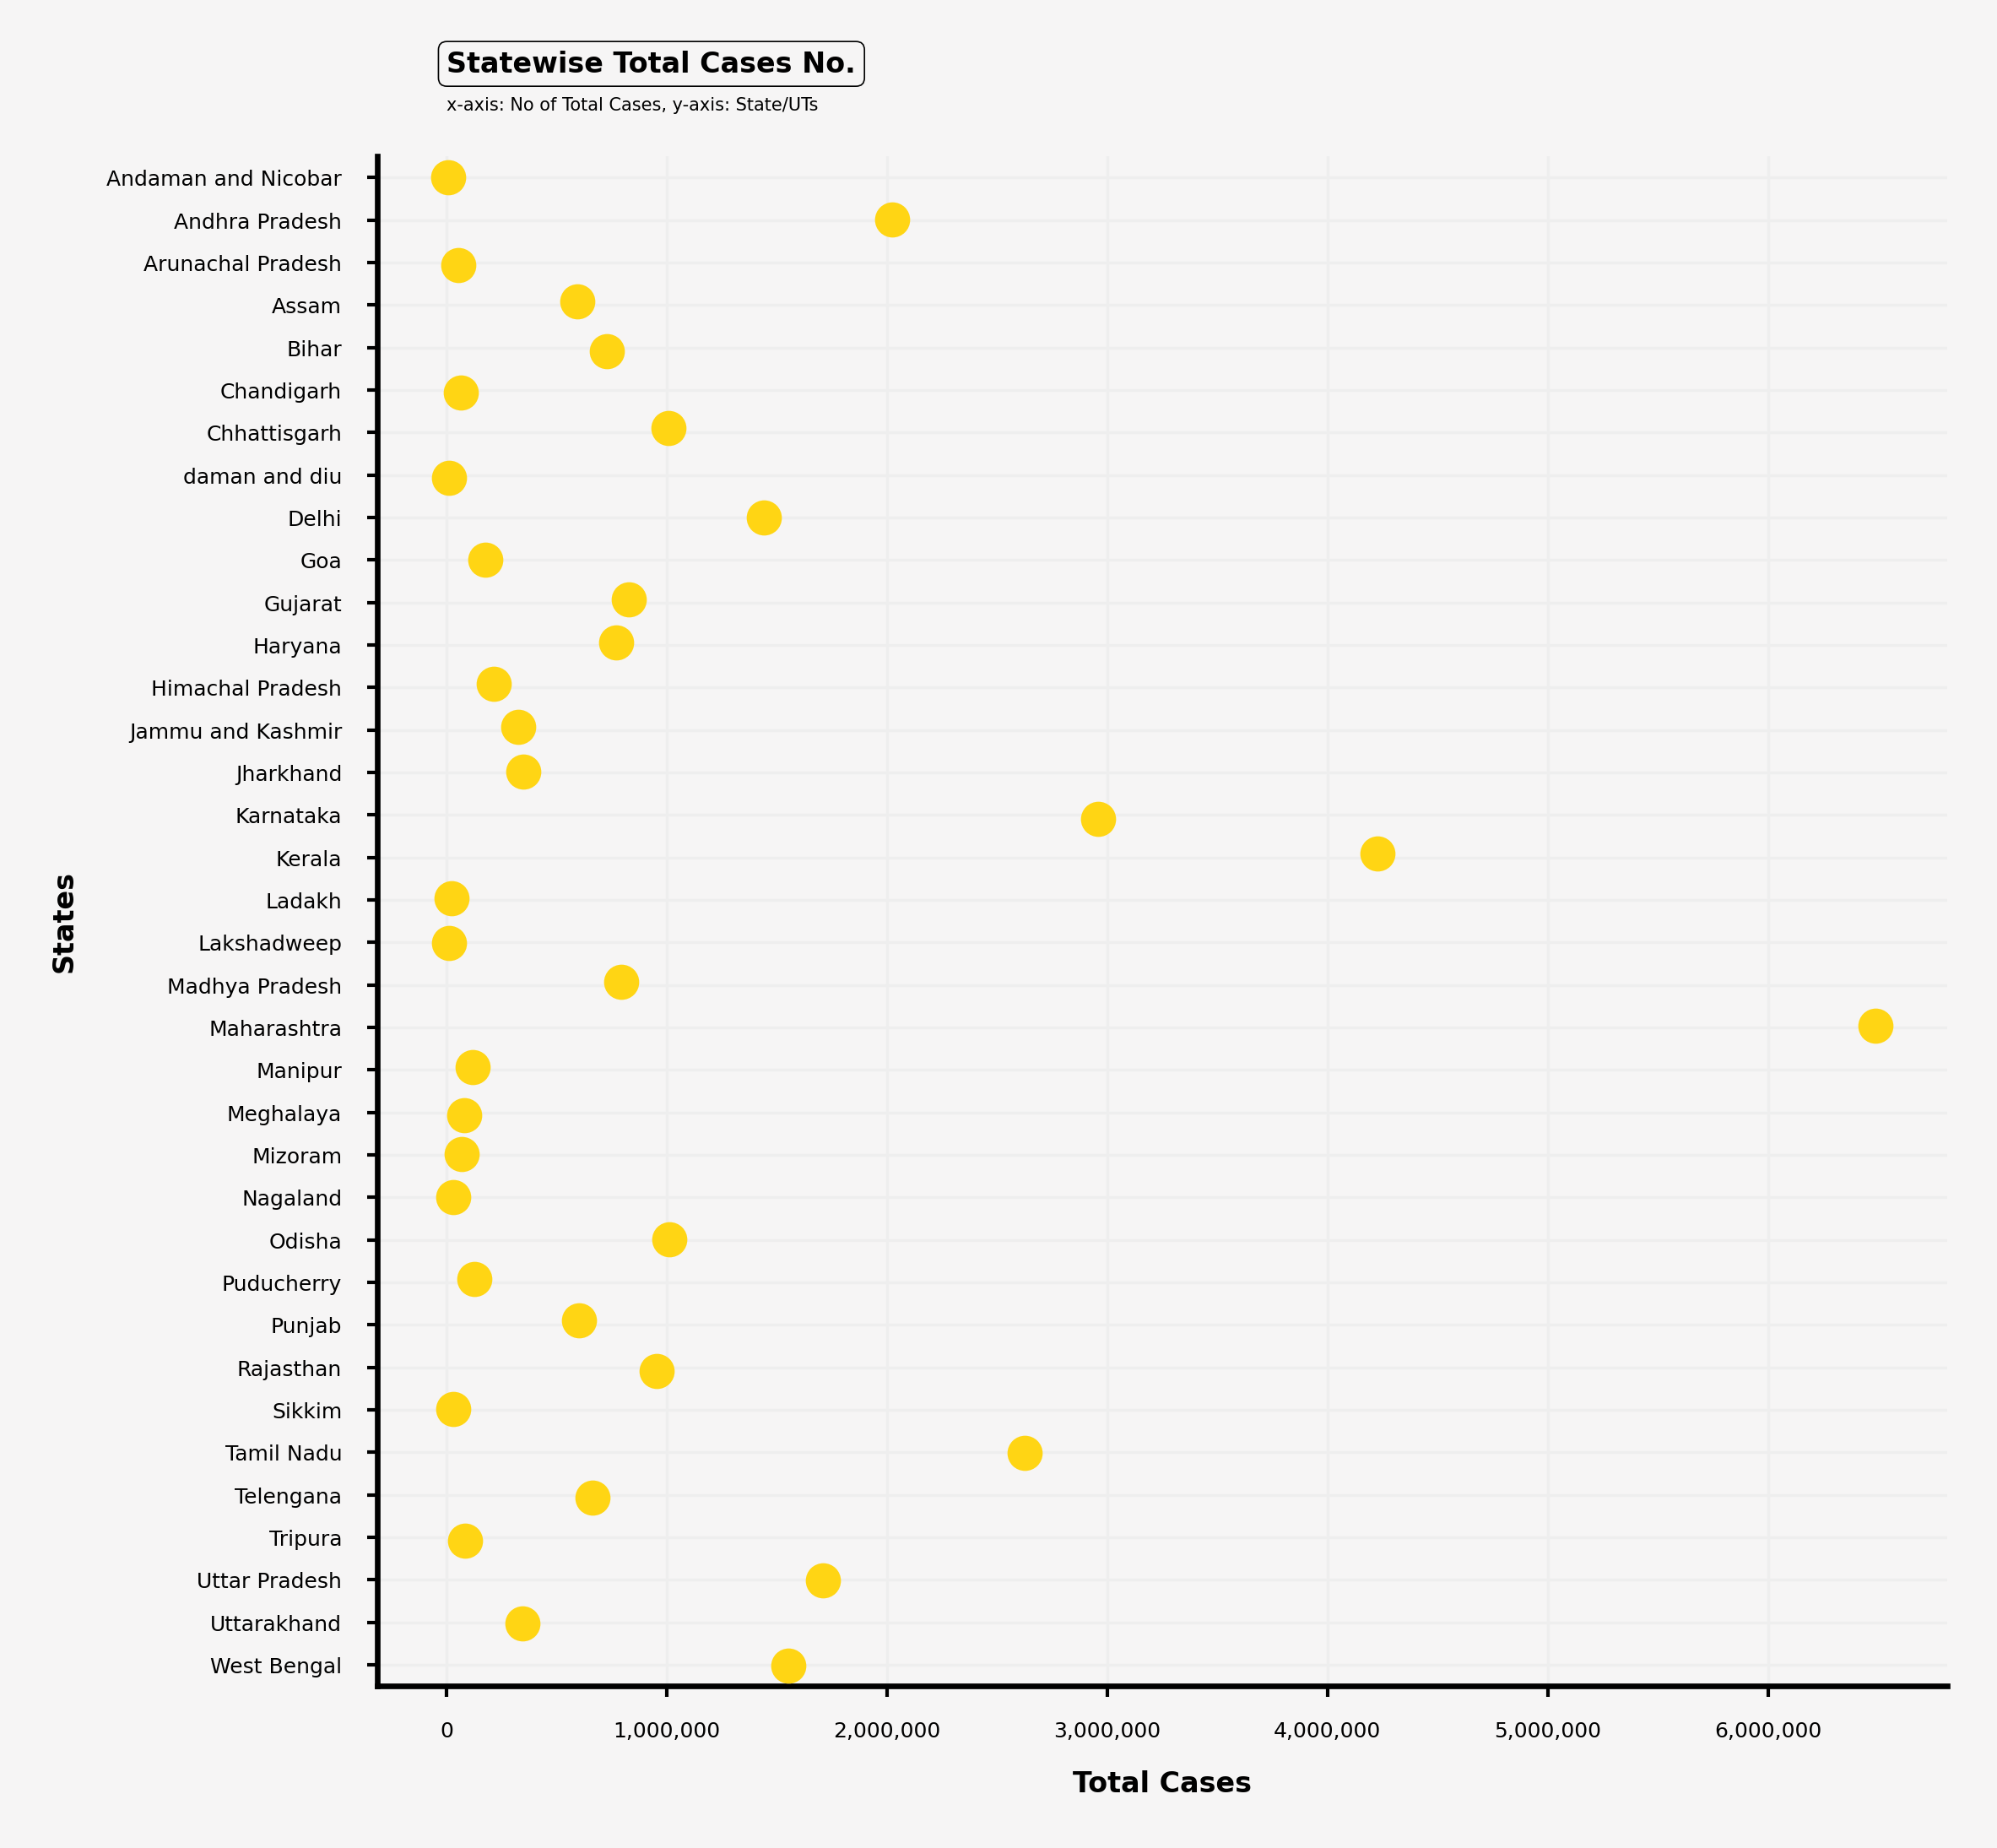

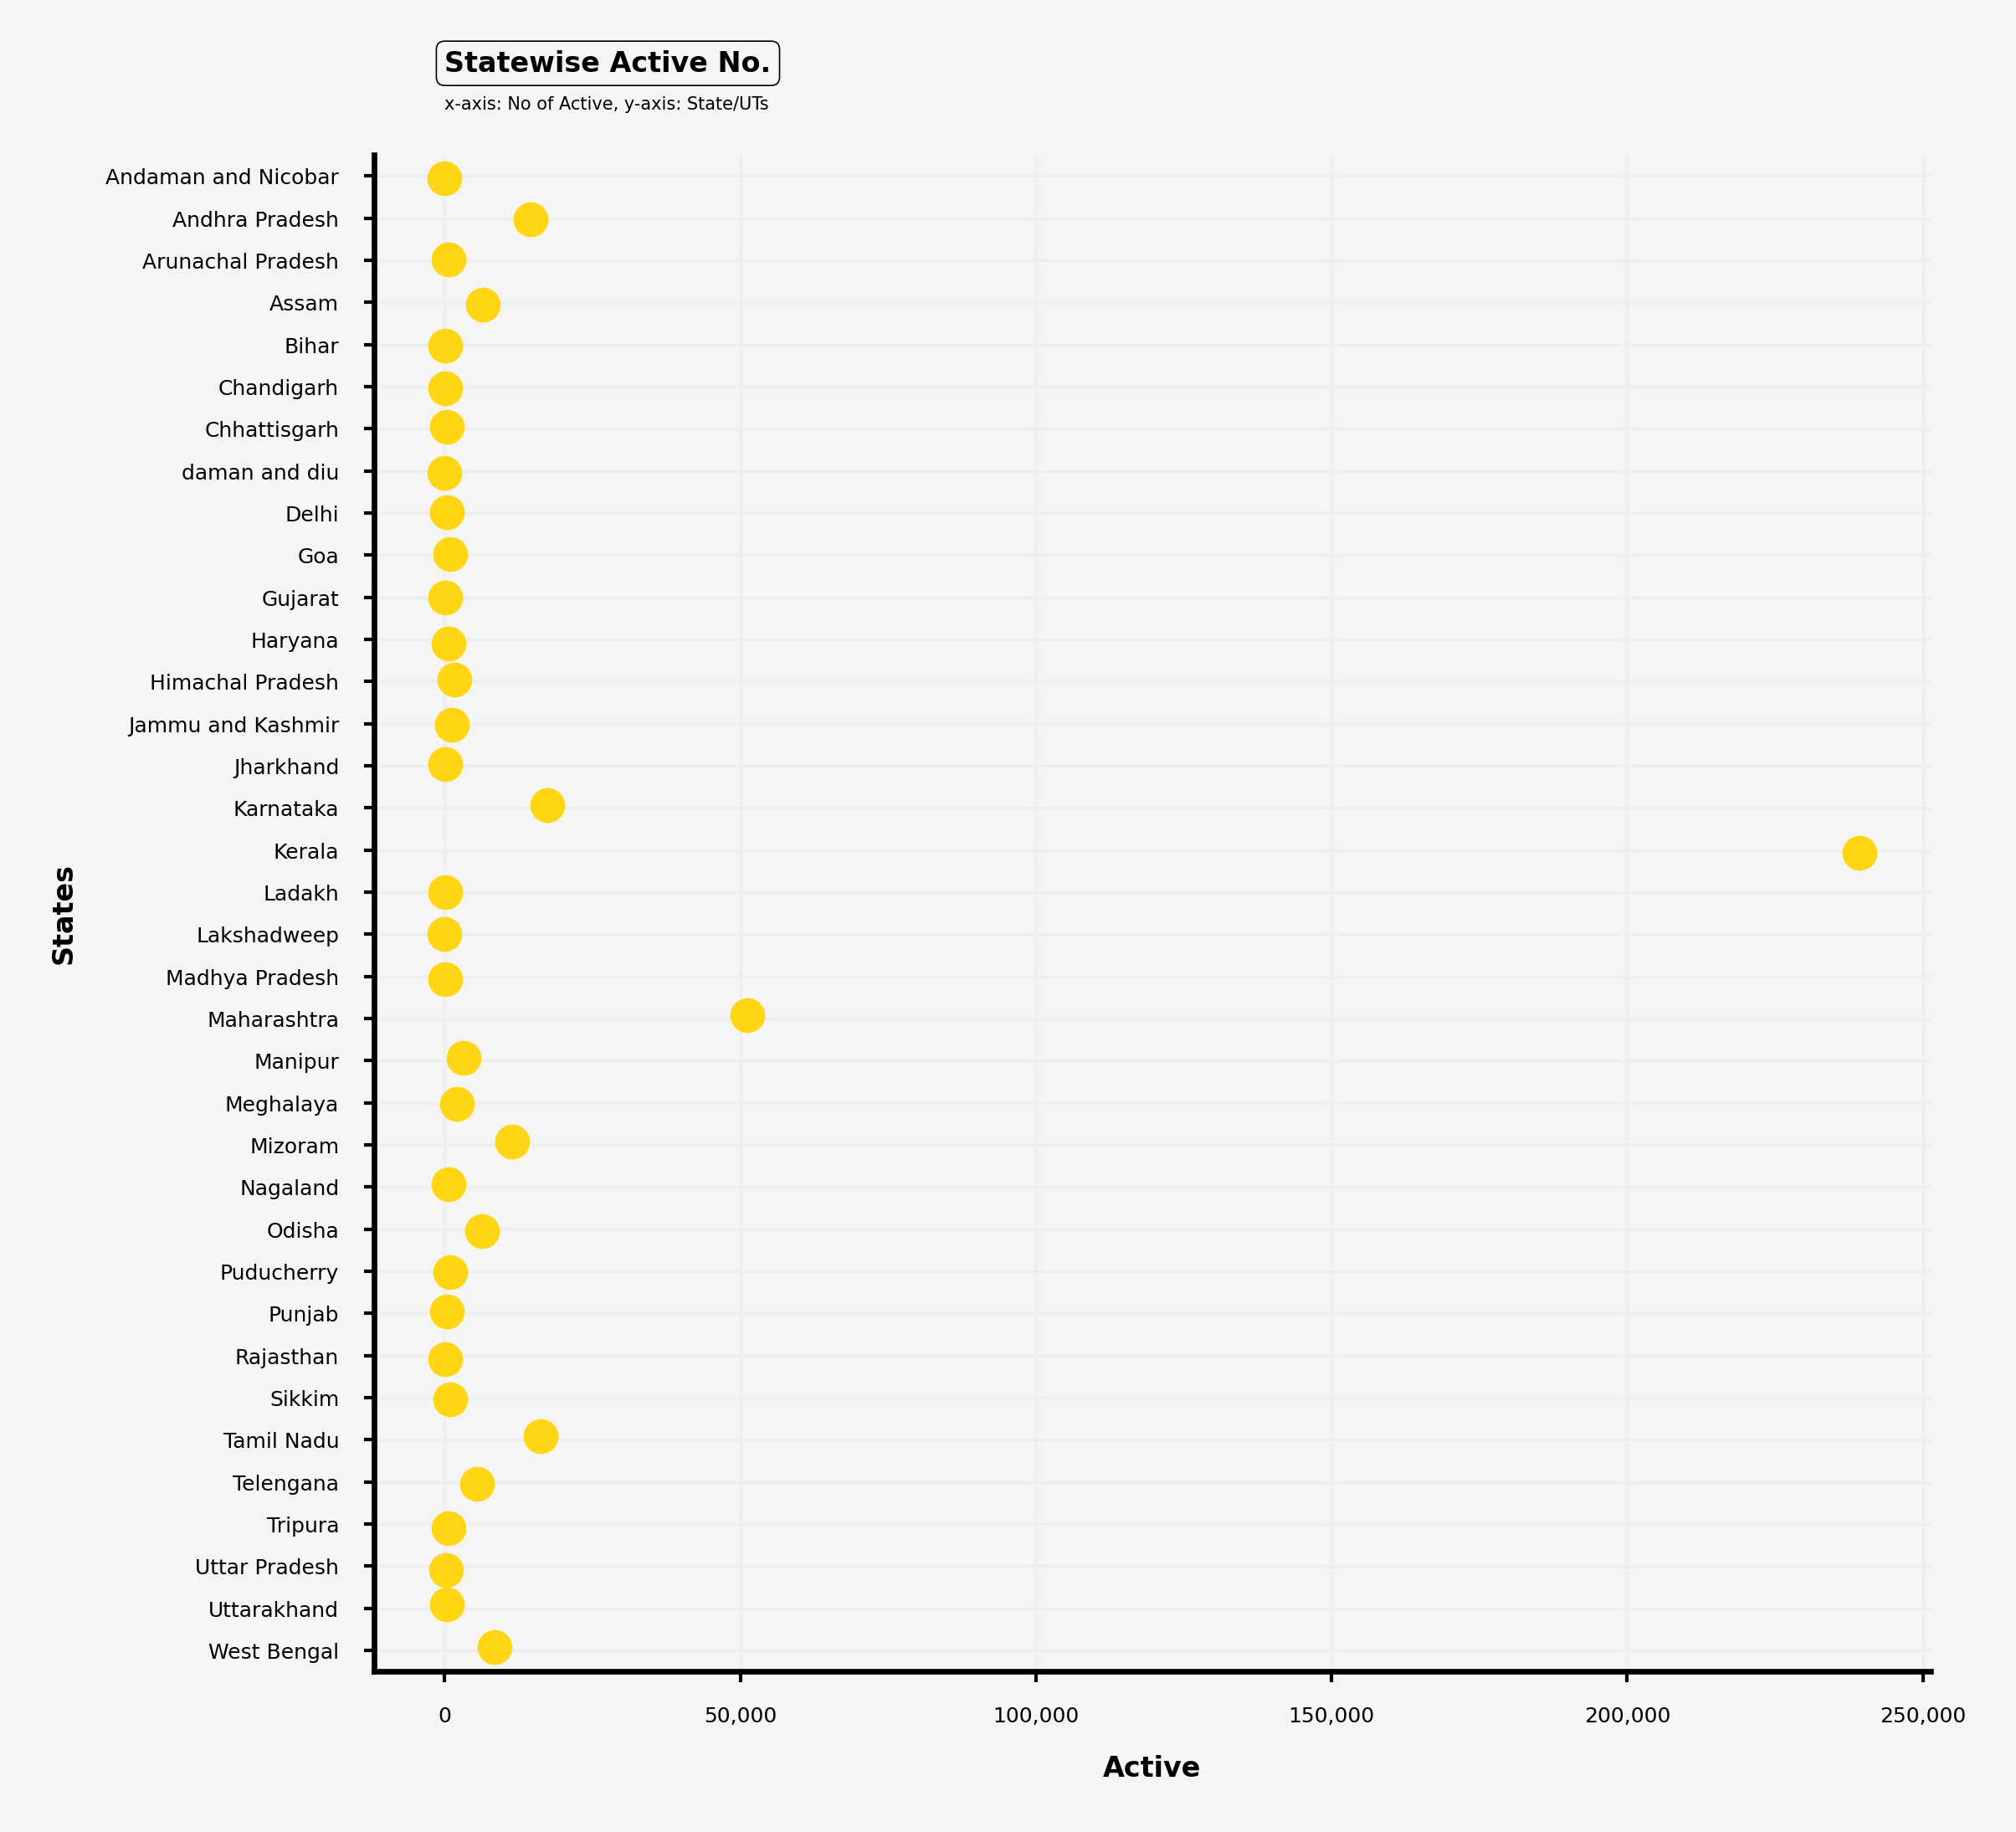

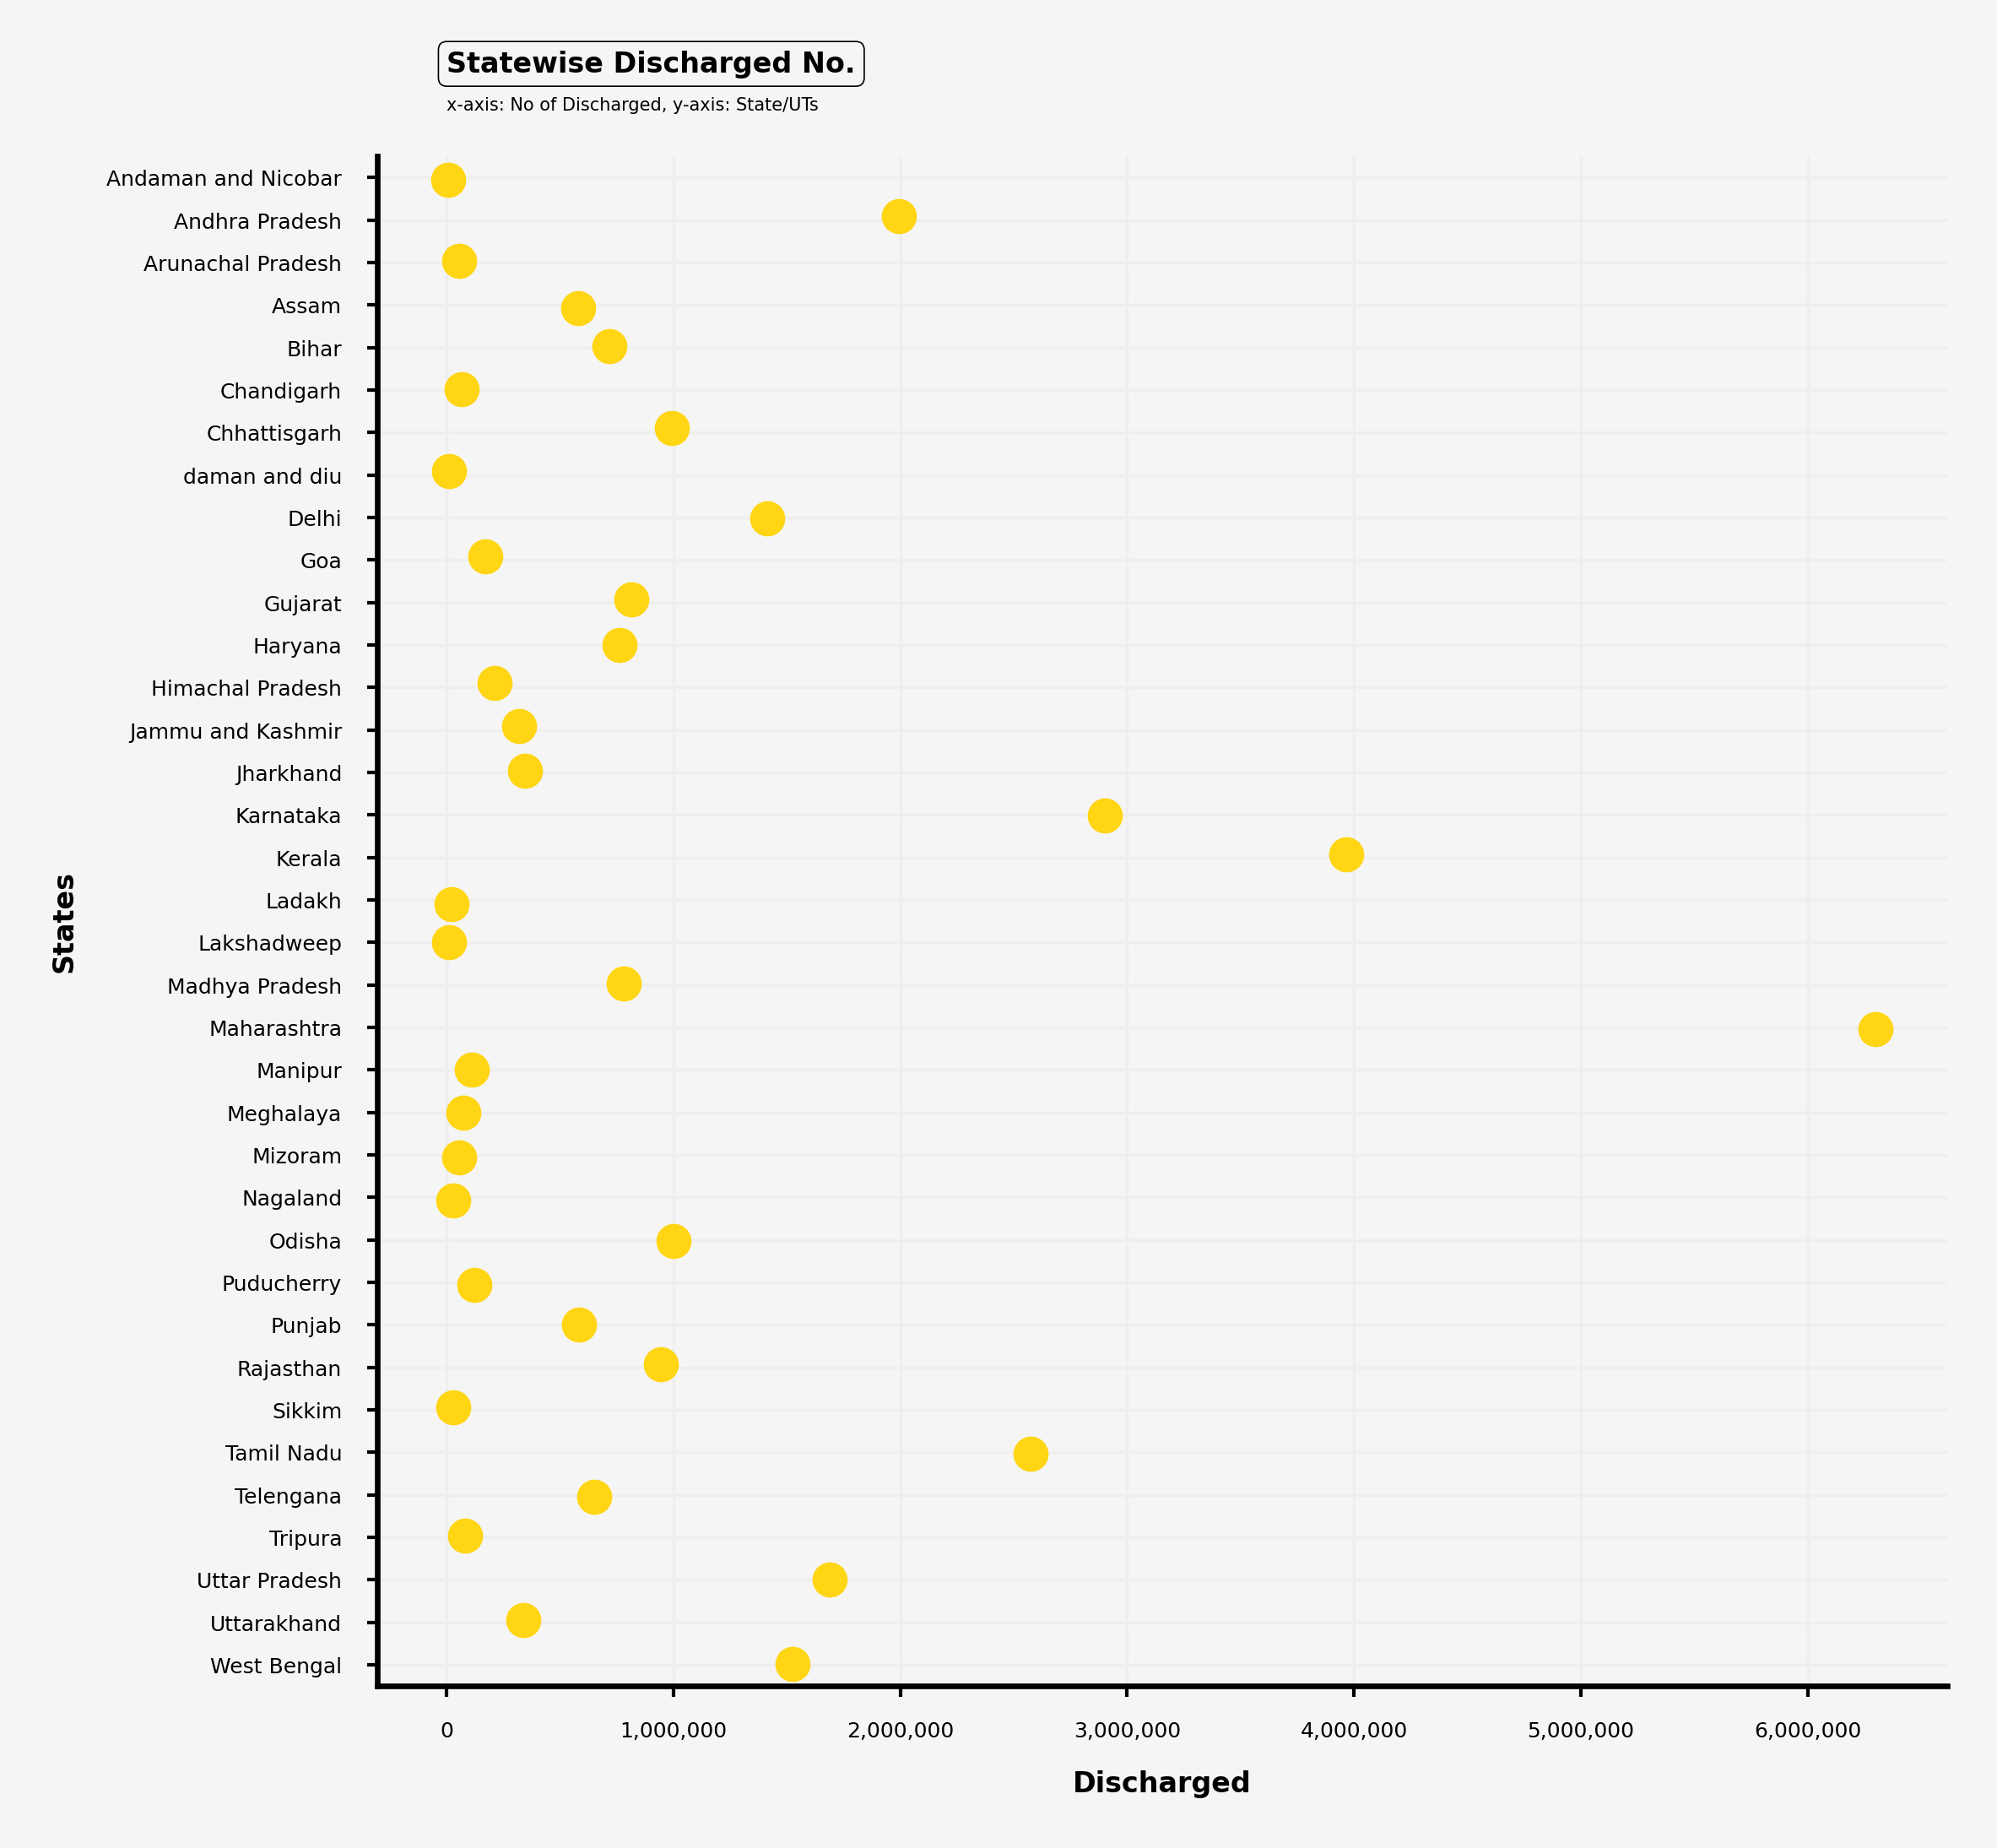

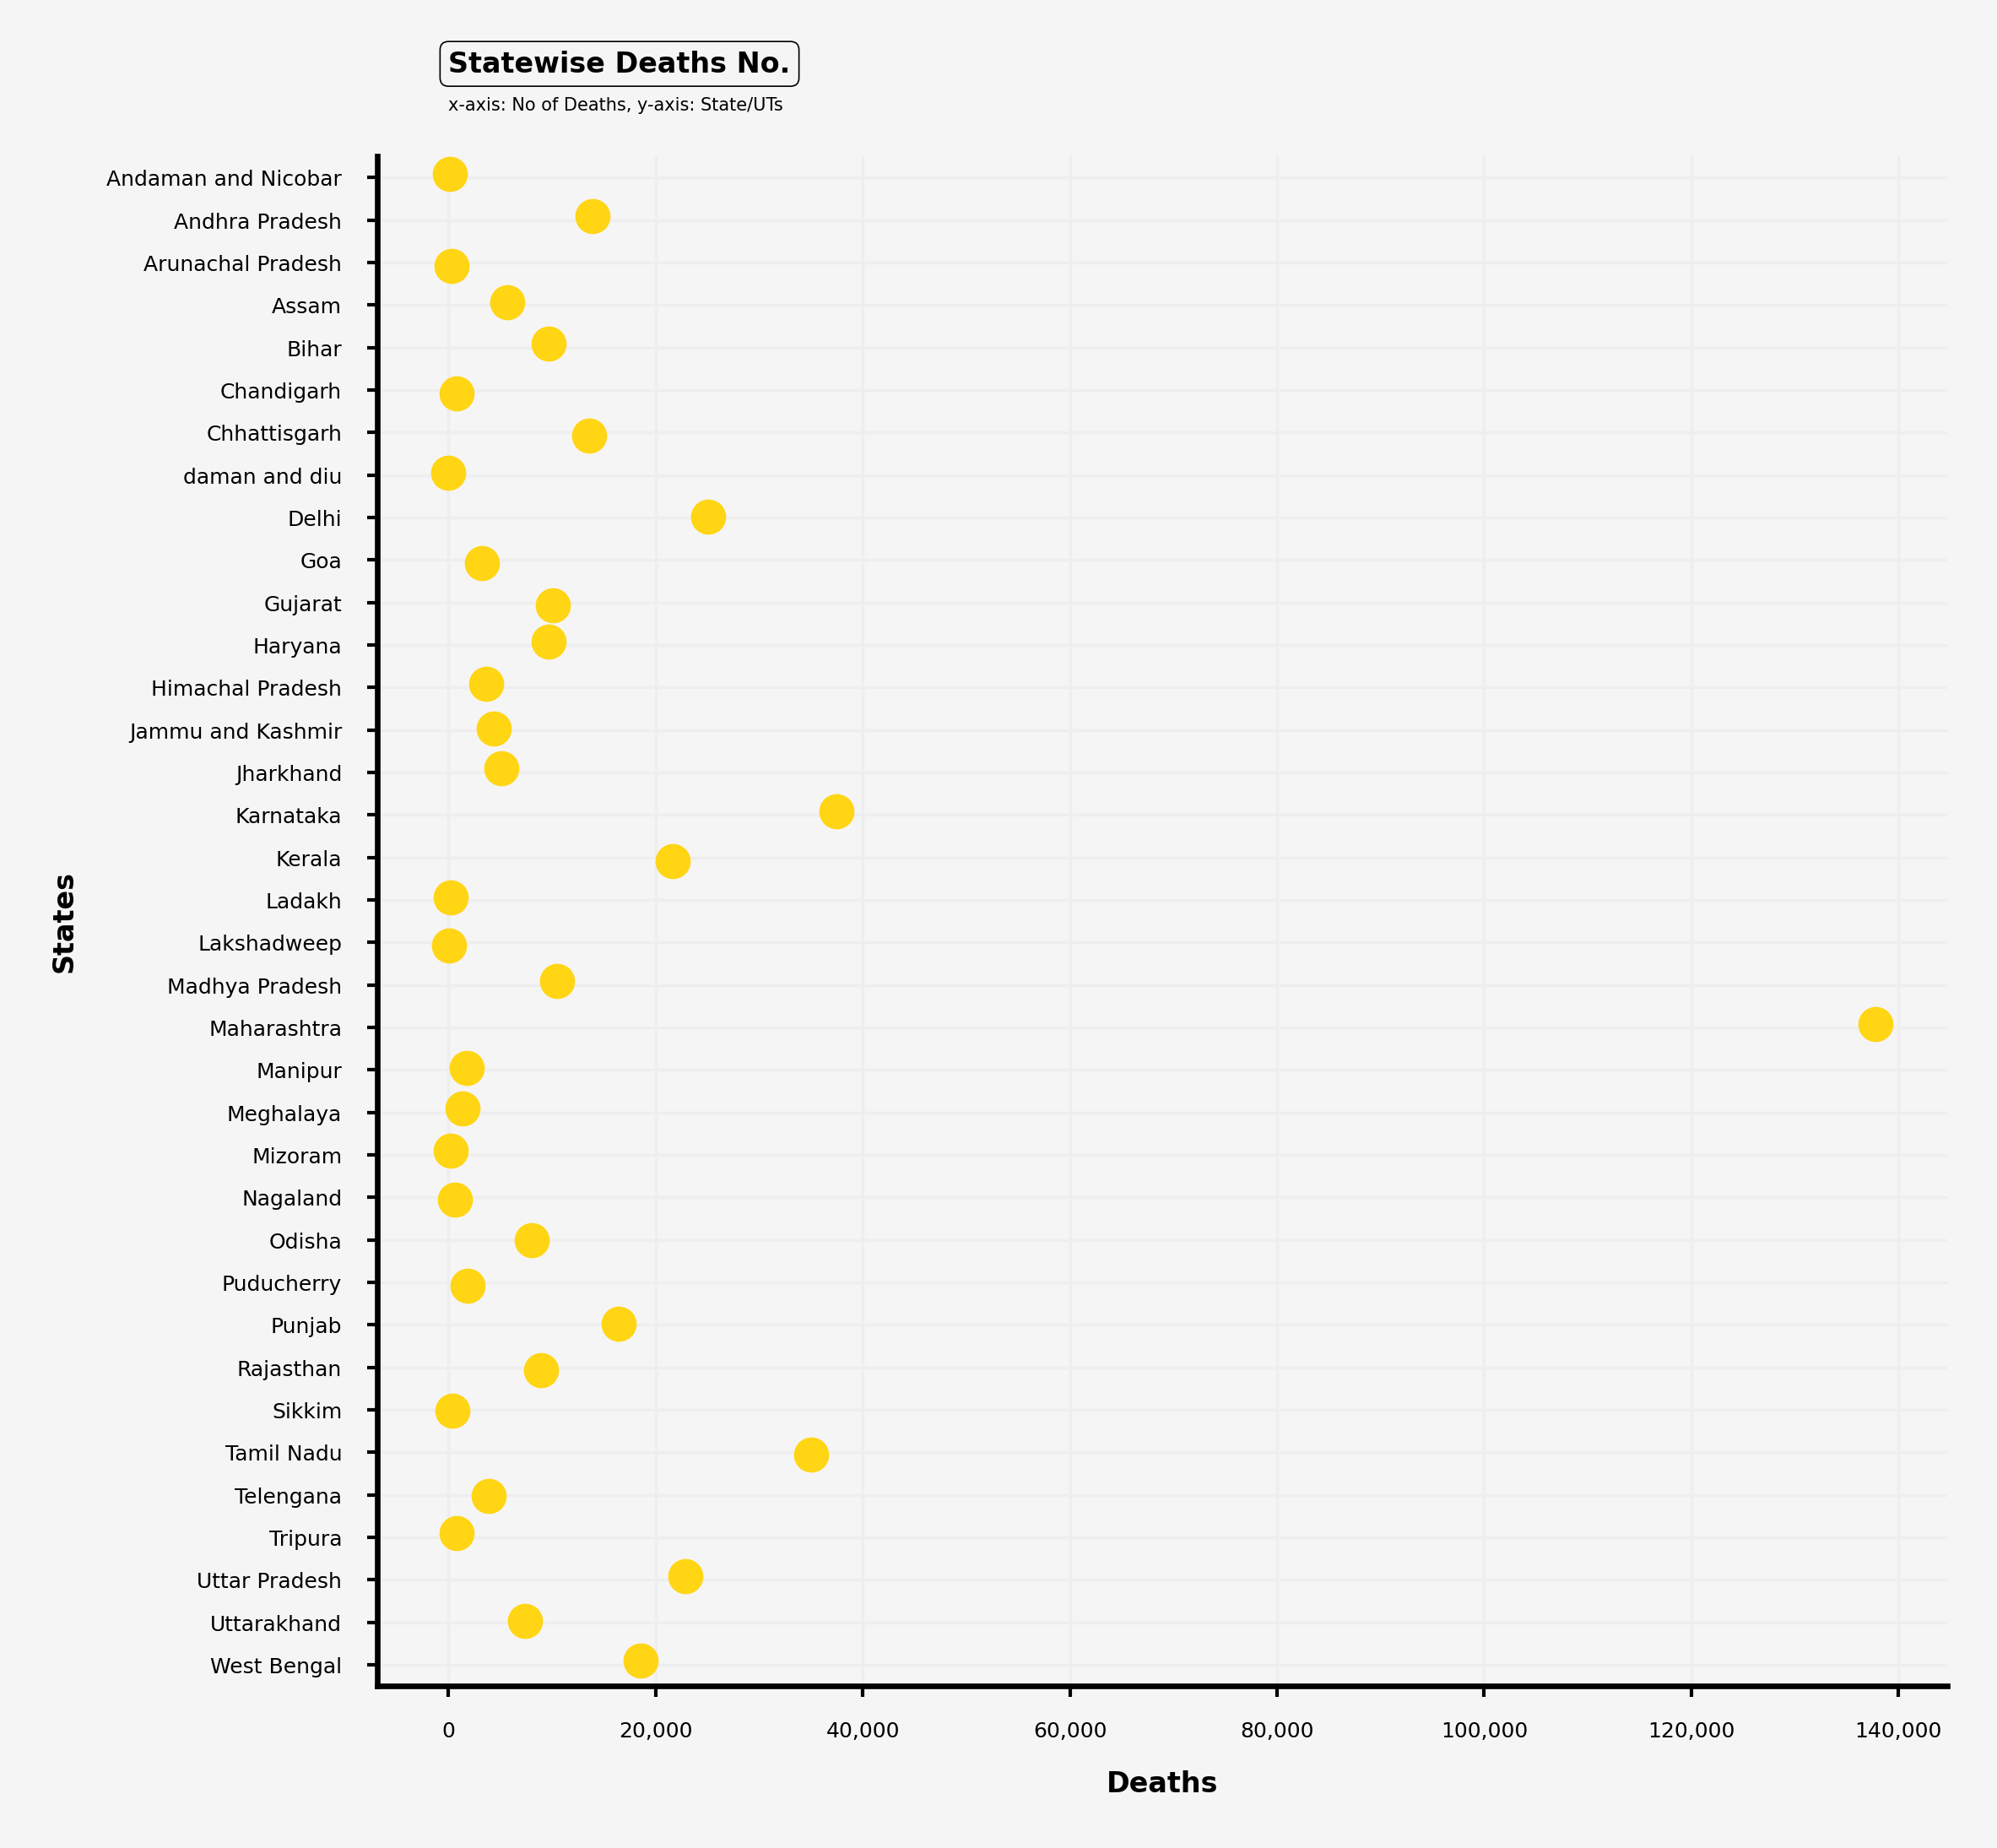

In [136]:
#stripplot of all  int and float features in the dataframe with respective to states

plt.rcParams['figure.dpi'] = 600

df_int = [col for col in df.columns if df[col].dtypes in ['int64']]

for i in (df_int):
    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ffd514']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)
    ax0_sns = sns.stripplot(x=df[i],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(i,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax0.text(0, -3, f'Statewise {i} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of {i}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


<a id="31"></a>
# **3.1.Regression Plot**

* [Jump to top](#0)

**1.Positive Correlation: 0.9**

* **Total Cases and Deaths**
* **Deaths and Discharged**
* **Total Cases and Discharged**

**2.Negative Correlation: -1.0**

* **Discharge Ratio and Active Ratio**

Text(-8500000, 690000, 'Total Cases and Discharged Correlation: 0.9')

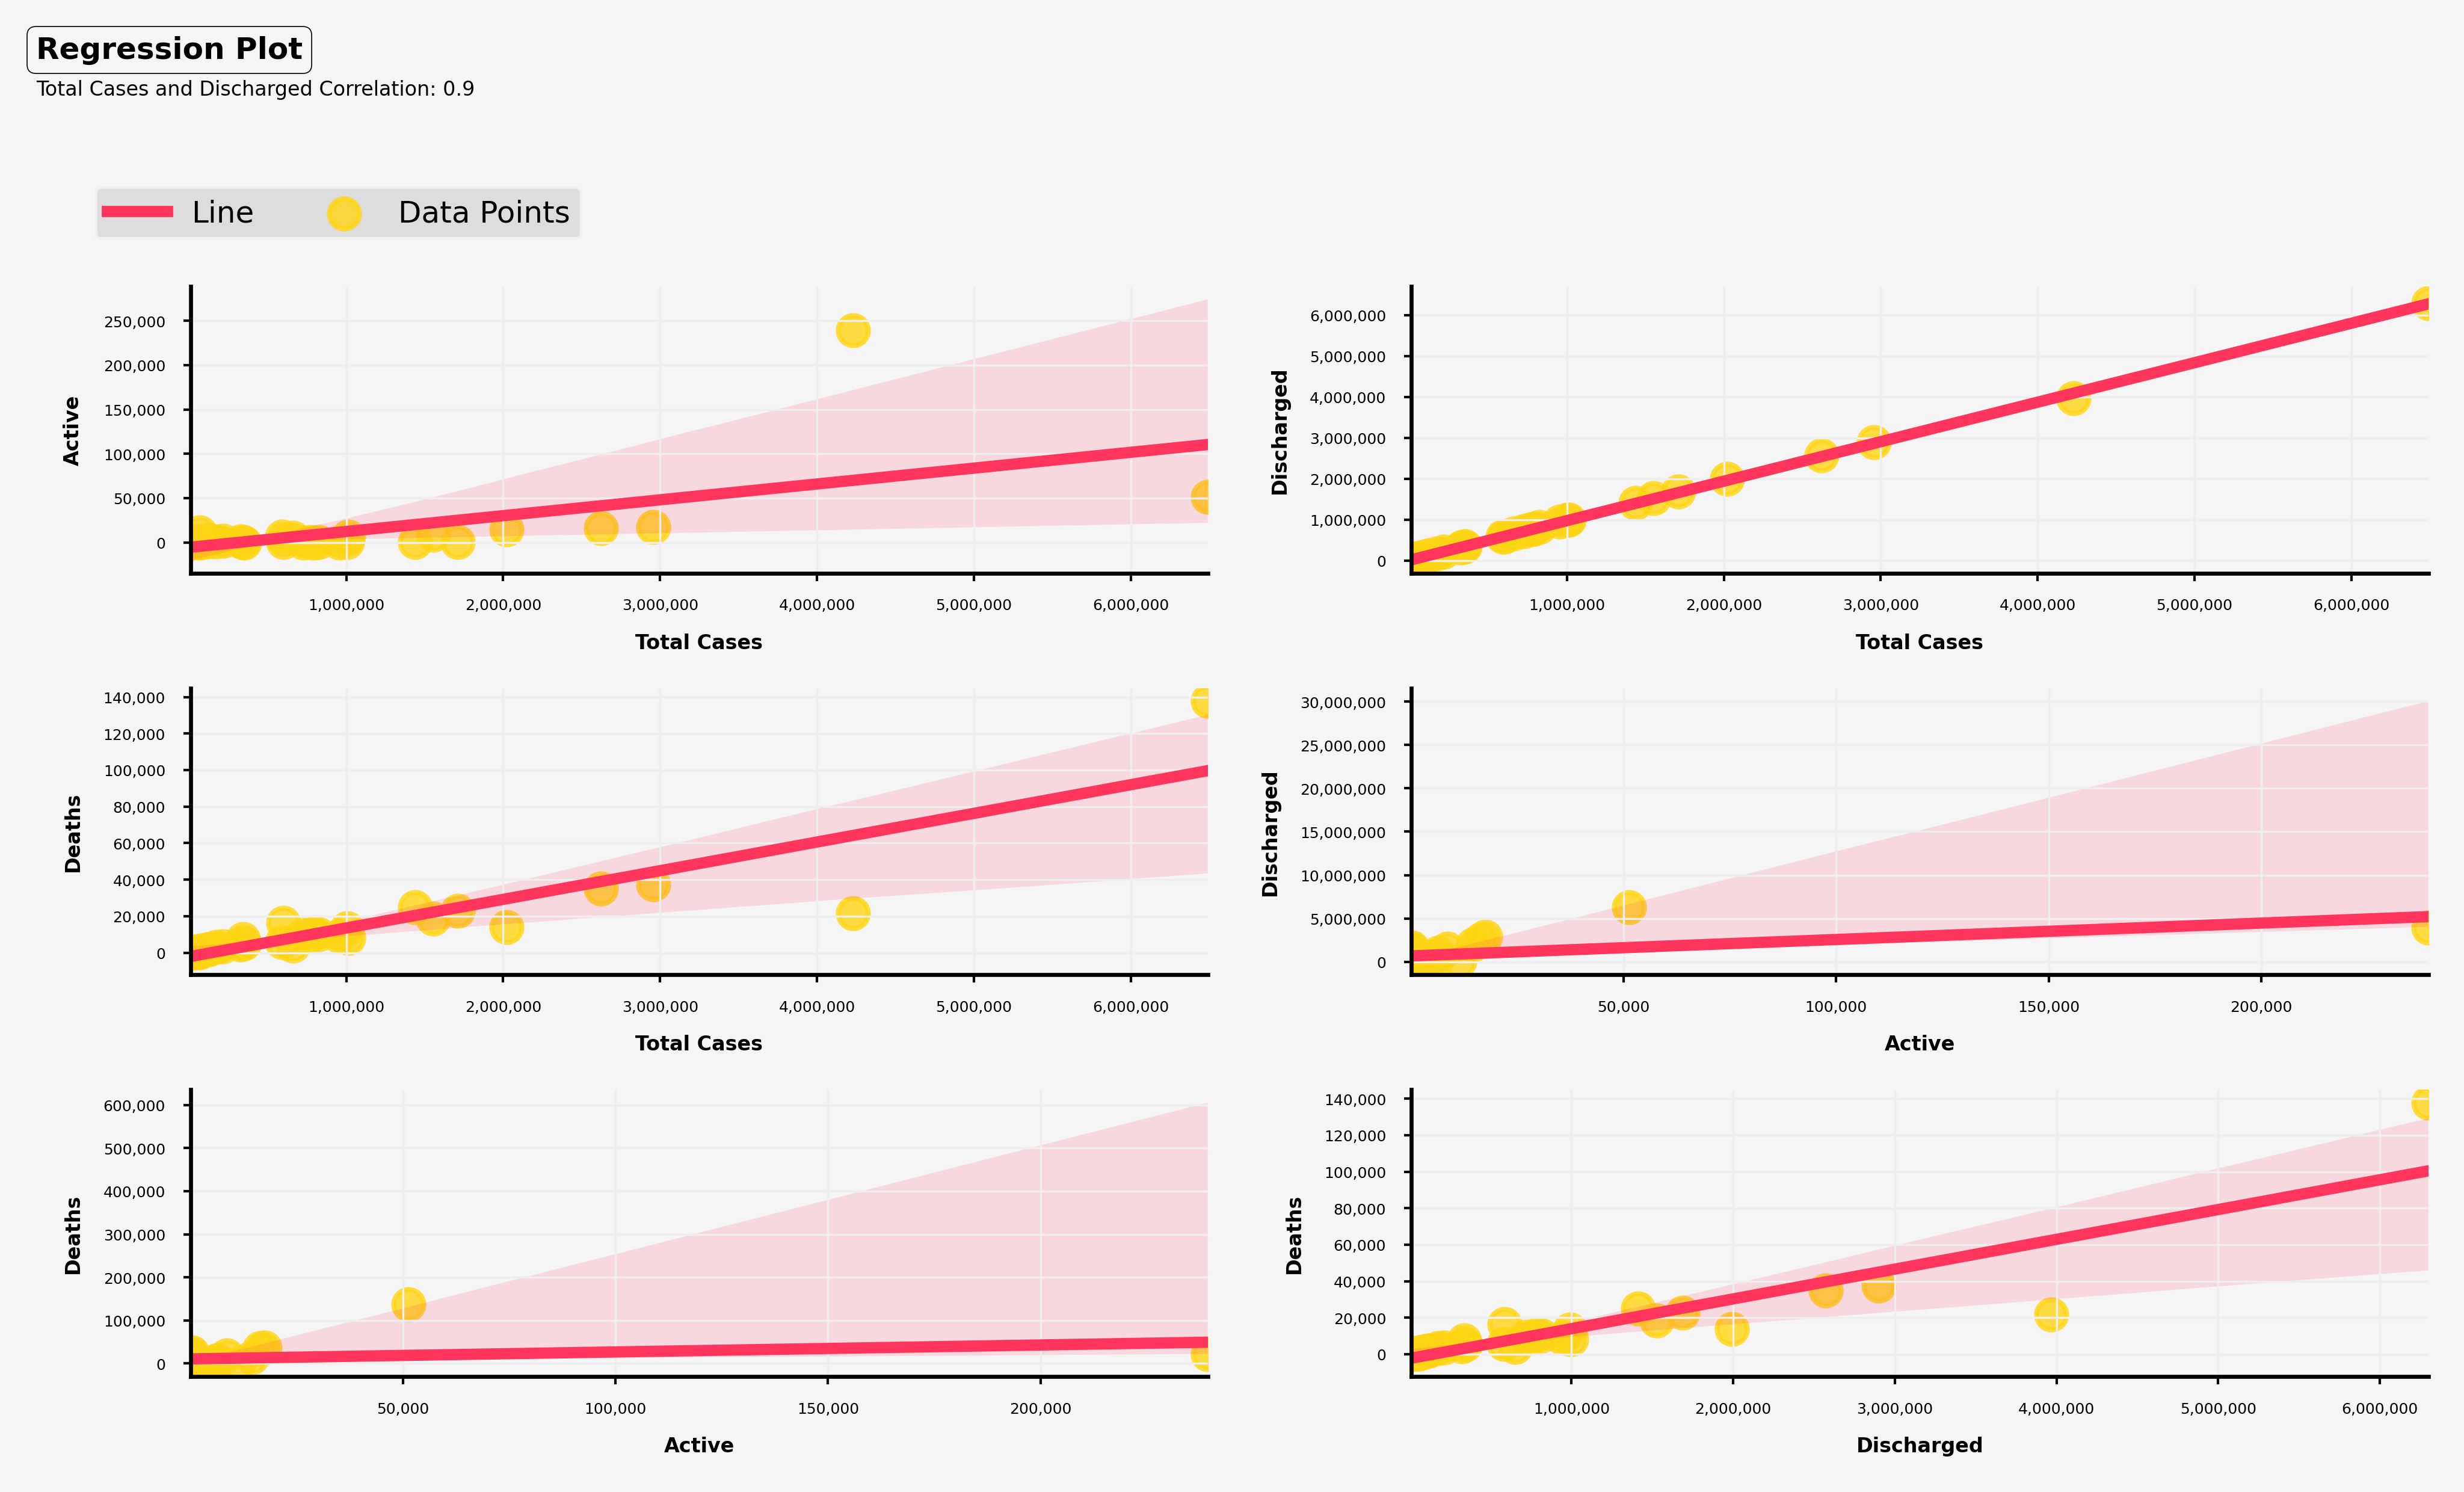

In [137]:
from itertools import combinations

plot = list(combinations(df_int, 2))

#regplot of all  int and float features in the dataframe with respective to states

plt.rcParams['figure.dpi'] = 600


fig = plt.figure(figsize=(8,4), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.2, hspace=0.4)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])


for indx, i in enumerate(plot):
    x = i[0]
    y = i[1]


    for s in ["right", "top"]:
        locals()['ax' + str(indx)].spines[s].set_visible(False)

    ax_sns = sns.regplot(x=df[x],y=df[y],ax=locals()['ax' + str(indx)],line_kws={'color': '#ff355d','alpha':1})
    # ax_sns.text(0,0, f'Statewise {x} No.', fontsize=4, weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    # ax_sns.text(12222, 10000, f'x-axis: No of {x}, y-axis: {y}', fontsize=2.5)


    locals()['ax' + str(indx)].set_facecolor(background_color)
    ax_sns.set_xlabel(x,fontsize=4, weight='bold',)
    ax_sns.set_ylabel(y,fontsize=4, weight='bold')

    ax_sns.tick_params(labelsize=3, width=0.5, length=1.5)
    ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    locals()['ax' + str(indx)].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    locals()['ax' + str(indx)].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
ax_sns.legend(['Line', 'Data Points'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=6, bbox_to_anchor=(-0.8, 4.2), loc='upper right')
ax_sns.text(-8500000, 710000, f'Regression Plot', fontsize=6, weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
ax_sns.text(-8500000, 690000, f'Total Cases and Discharged Correlation: 0.9', fontsize=4)

Text(81.2, 34.5, 'Active & Discharge Correlation: -1.0')

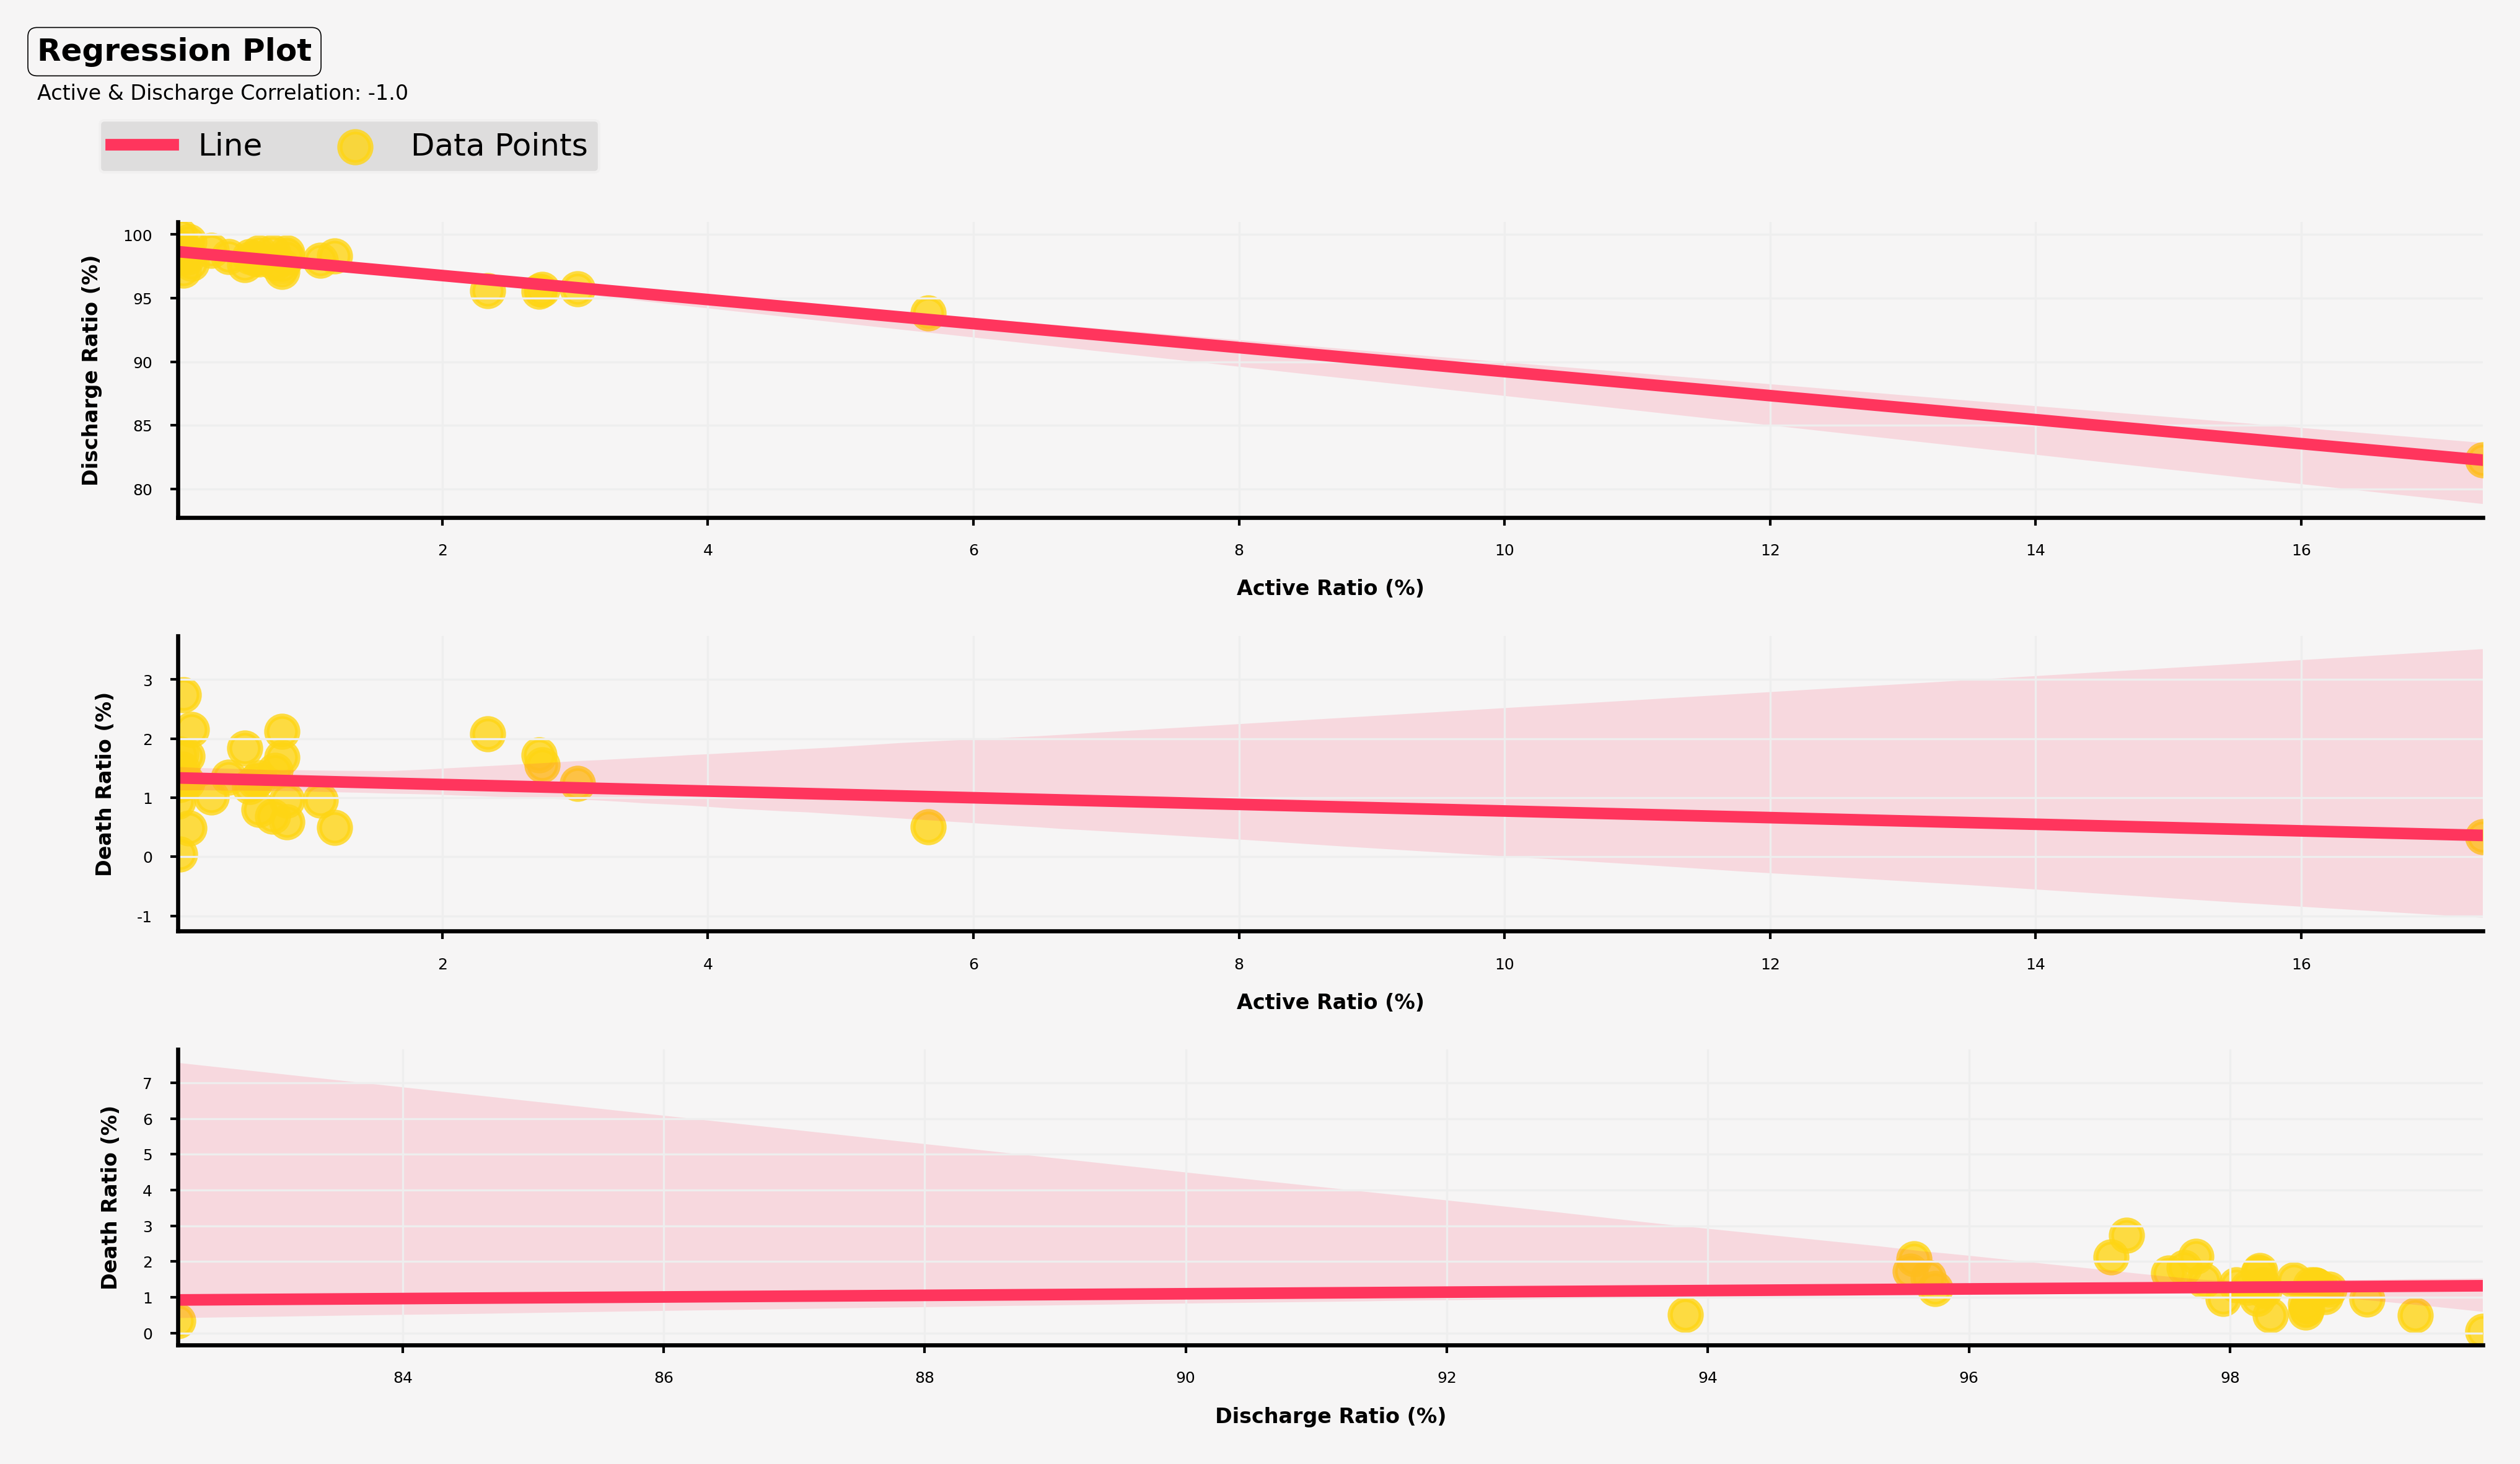

In [138]:
from itertools import combinations

df_float = [col for col in df.columns if df[col].dtypes in ['float64']]

plot = list(combinations(df_float, 2))

#regplot of all  int and float features in the dataframe with respective to states

plt.rcParams['figure.dpi'] = 600


fig = plt.figure(figsize=(8,4), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.2, hspace=0.4)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

for indx, i in enumerate(plot):
    x = i[0]
    y = i[1]


    for s in ["right", "top"]:
        locals()['ax' + str(indx)].spines[s].set_visible(False)

    ax_sns = sns.regplot(x=df[x],y=df[y],ax=locals()['ax' + str(indx)],line_kws={'color': '#ff355d','alpha':1})
    # ax_sns.text(0,0, f'Statewise {x} No.', fontsize=4, weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    # ax_sns.text(12222, 10000, f'x-axis: No of {x}, y-axis: {y}', fontsize=2.5)


    locals()['ax' + str(indx)].set_facecolor(background_color)
    ax_sns.set_xlabel(x,fontsize=4, weight='bold',)
    ax_sns.set_ylabel(y,fontsize=4, weight='bold')

    ax_sns.tick_params(labelsize=3, width=0.5, length=1.5)
    ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    locals()['ax' + str(indx)].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    locals()['ax' + str(indx)].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
ax_sns.legend(['Line', 'Data Points'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=6, bbox_to_anchor=(0.19, 4.2), loc='upper right')
ax_sns.text(81.2, 35.6, f'Regression Plot', fontsize=6, weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
ax_sns.text(81.2, 34.5, f'Active & Discharge Correlation: -1.0', fontsize=4)

# **5.Bar Plot of the Columns Values**
<a id = '5'> </a>
* [Jump to top](#0)

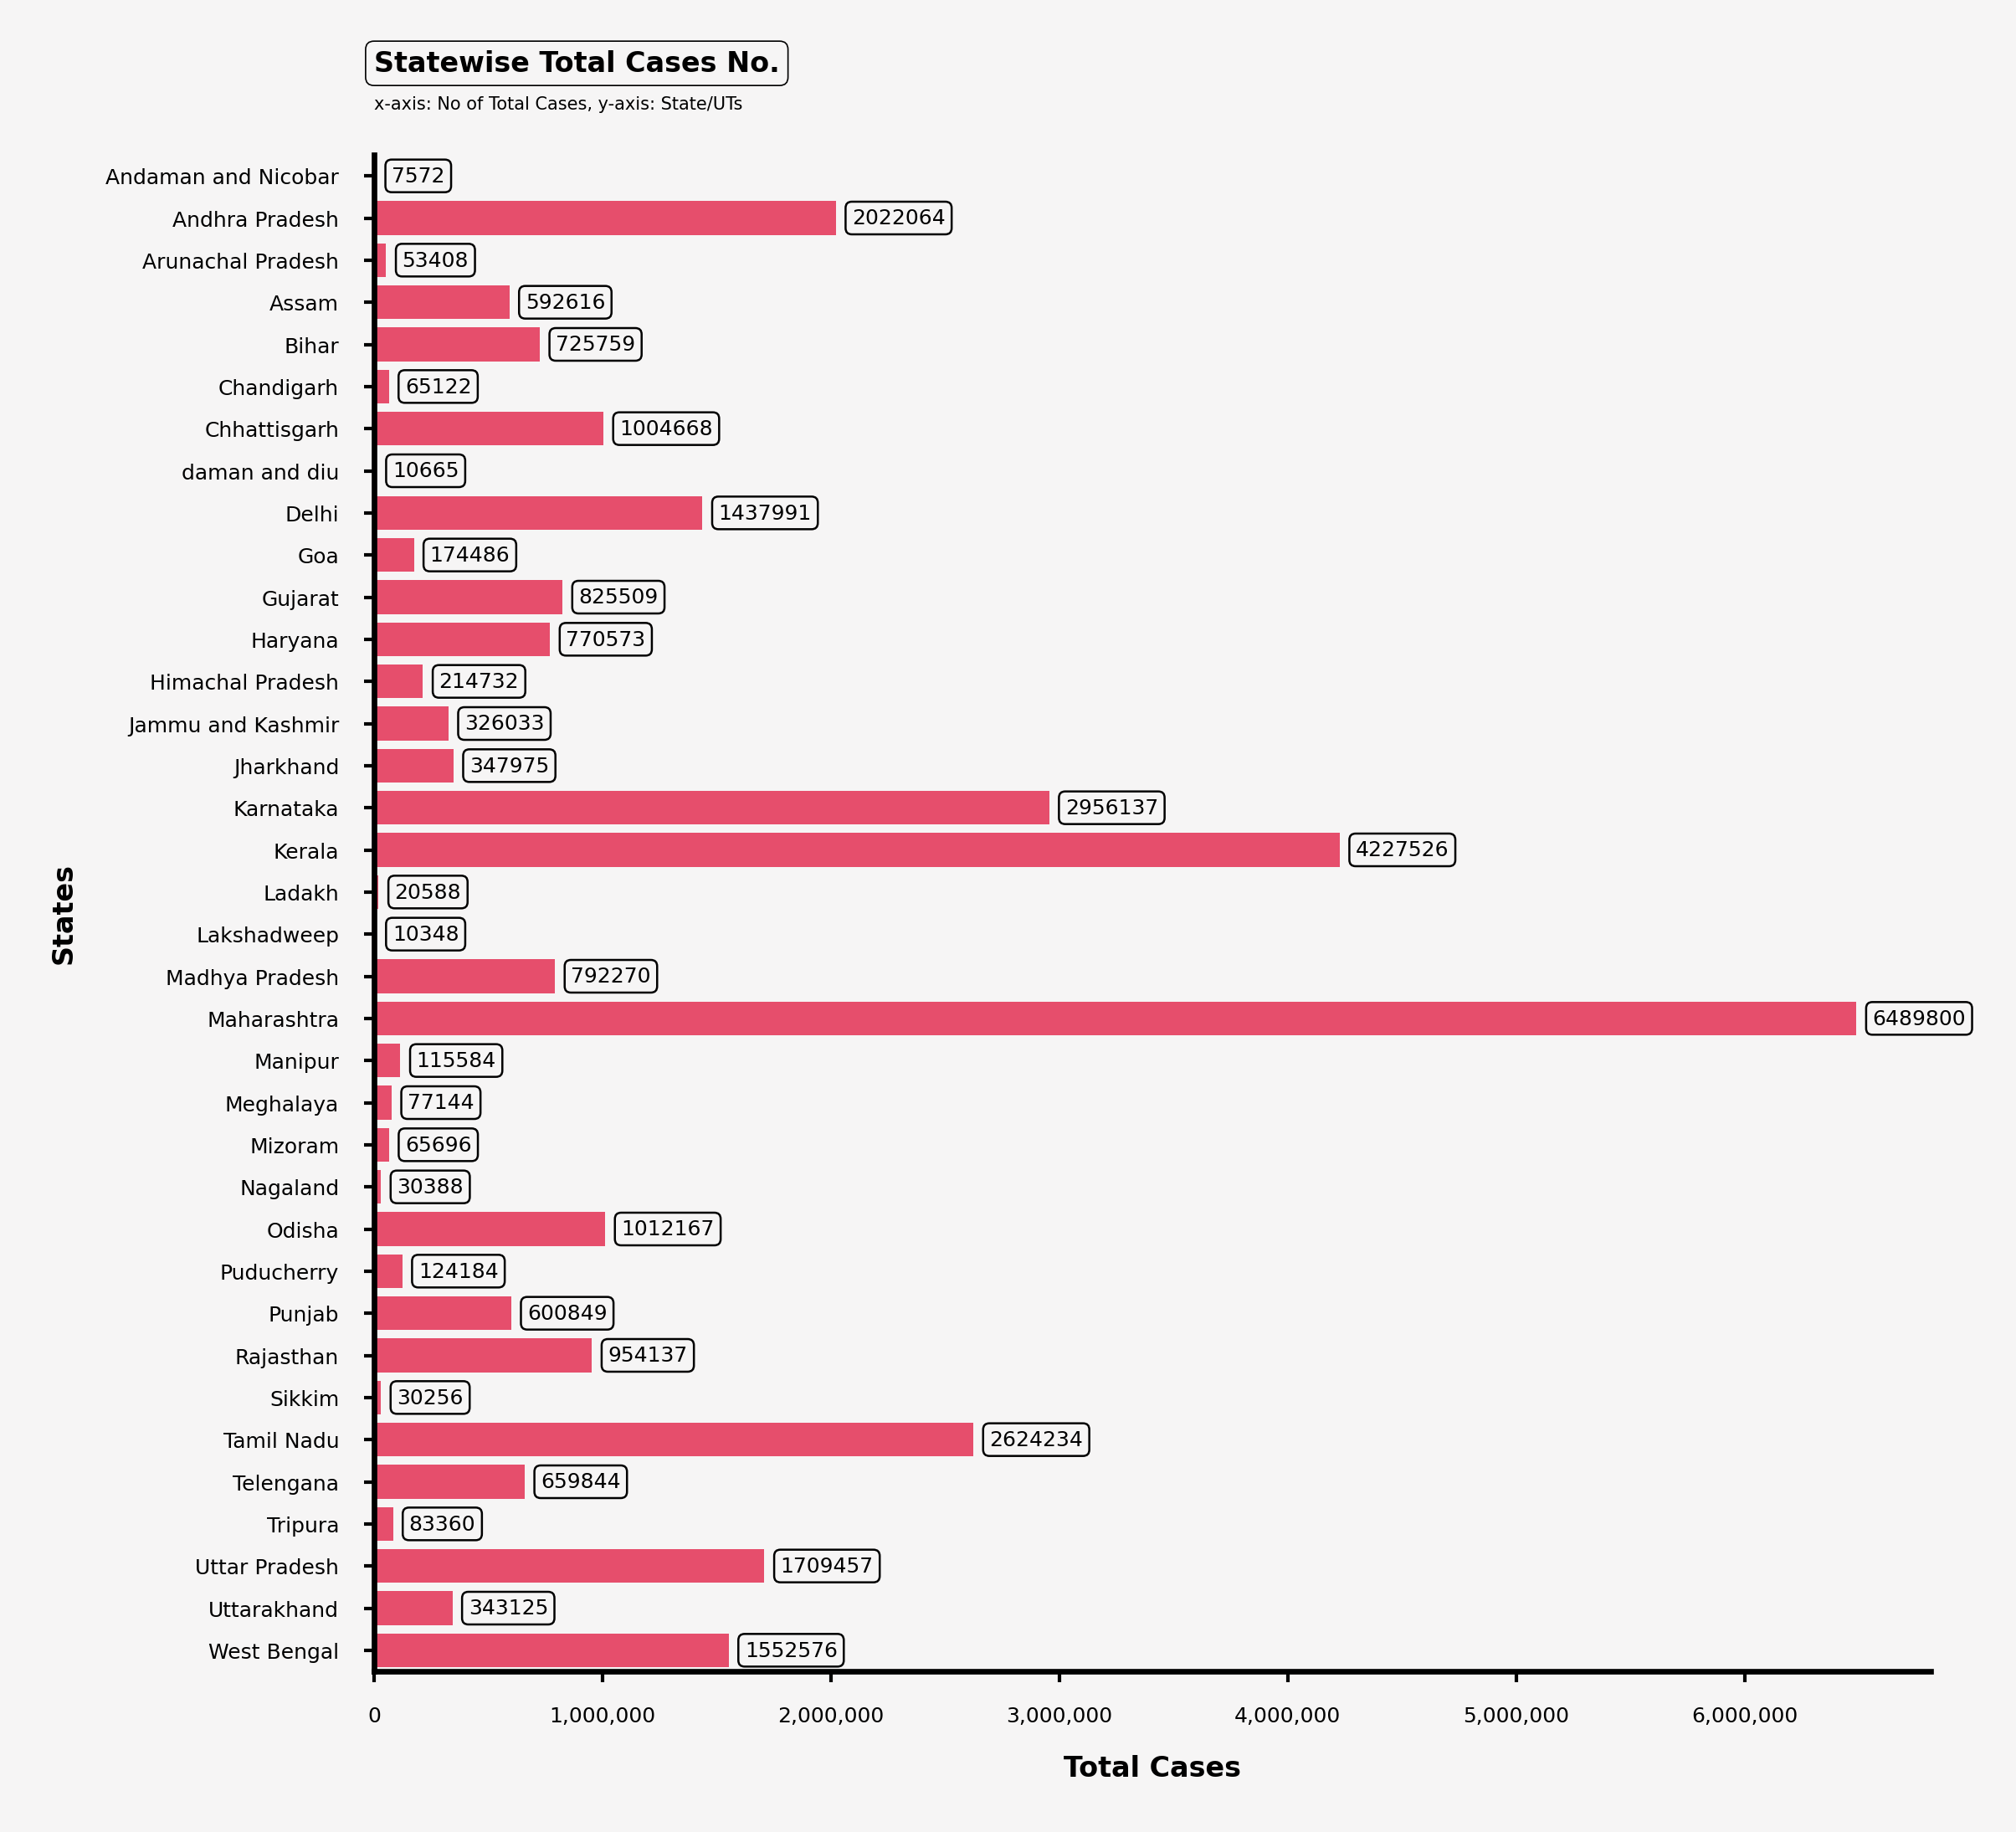

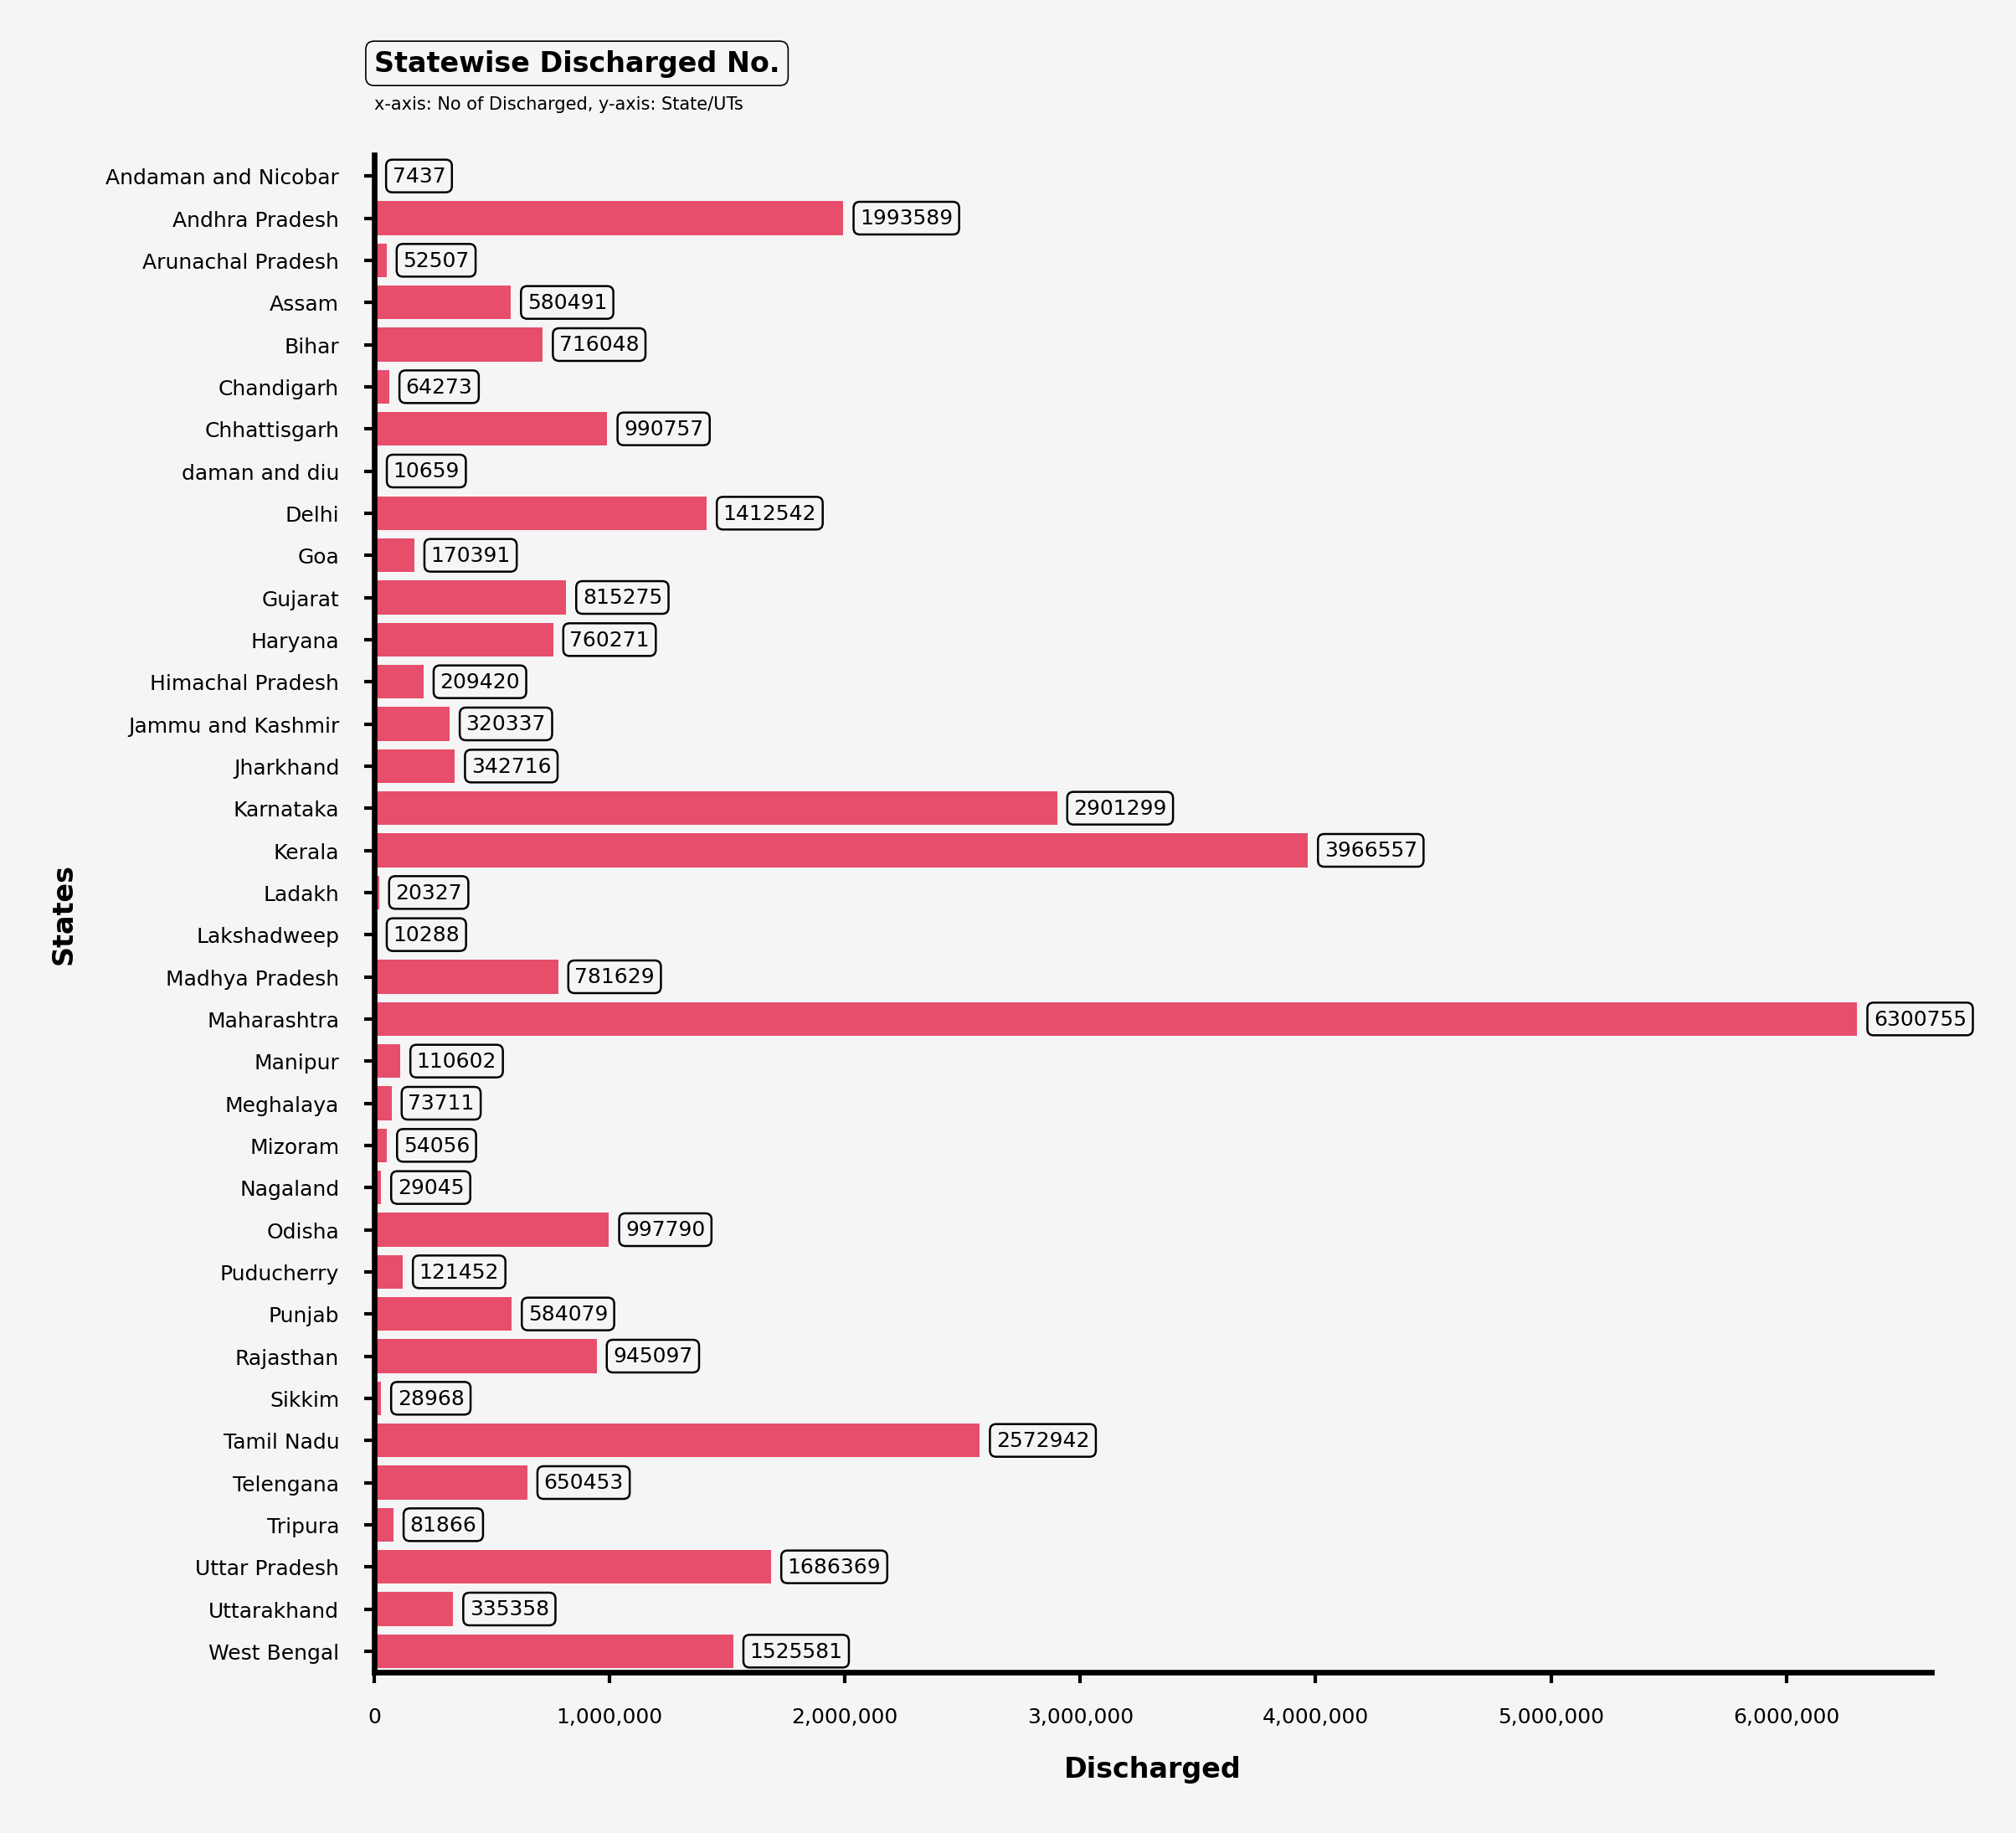

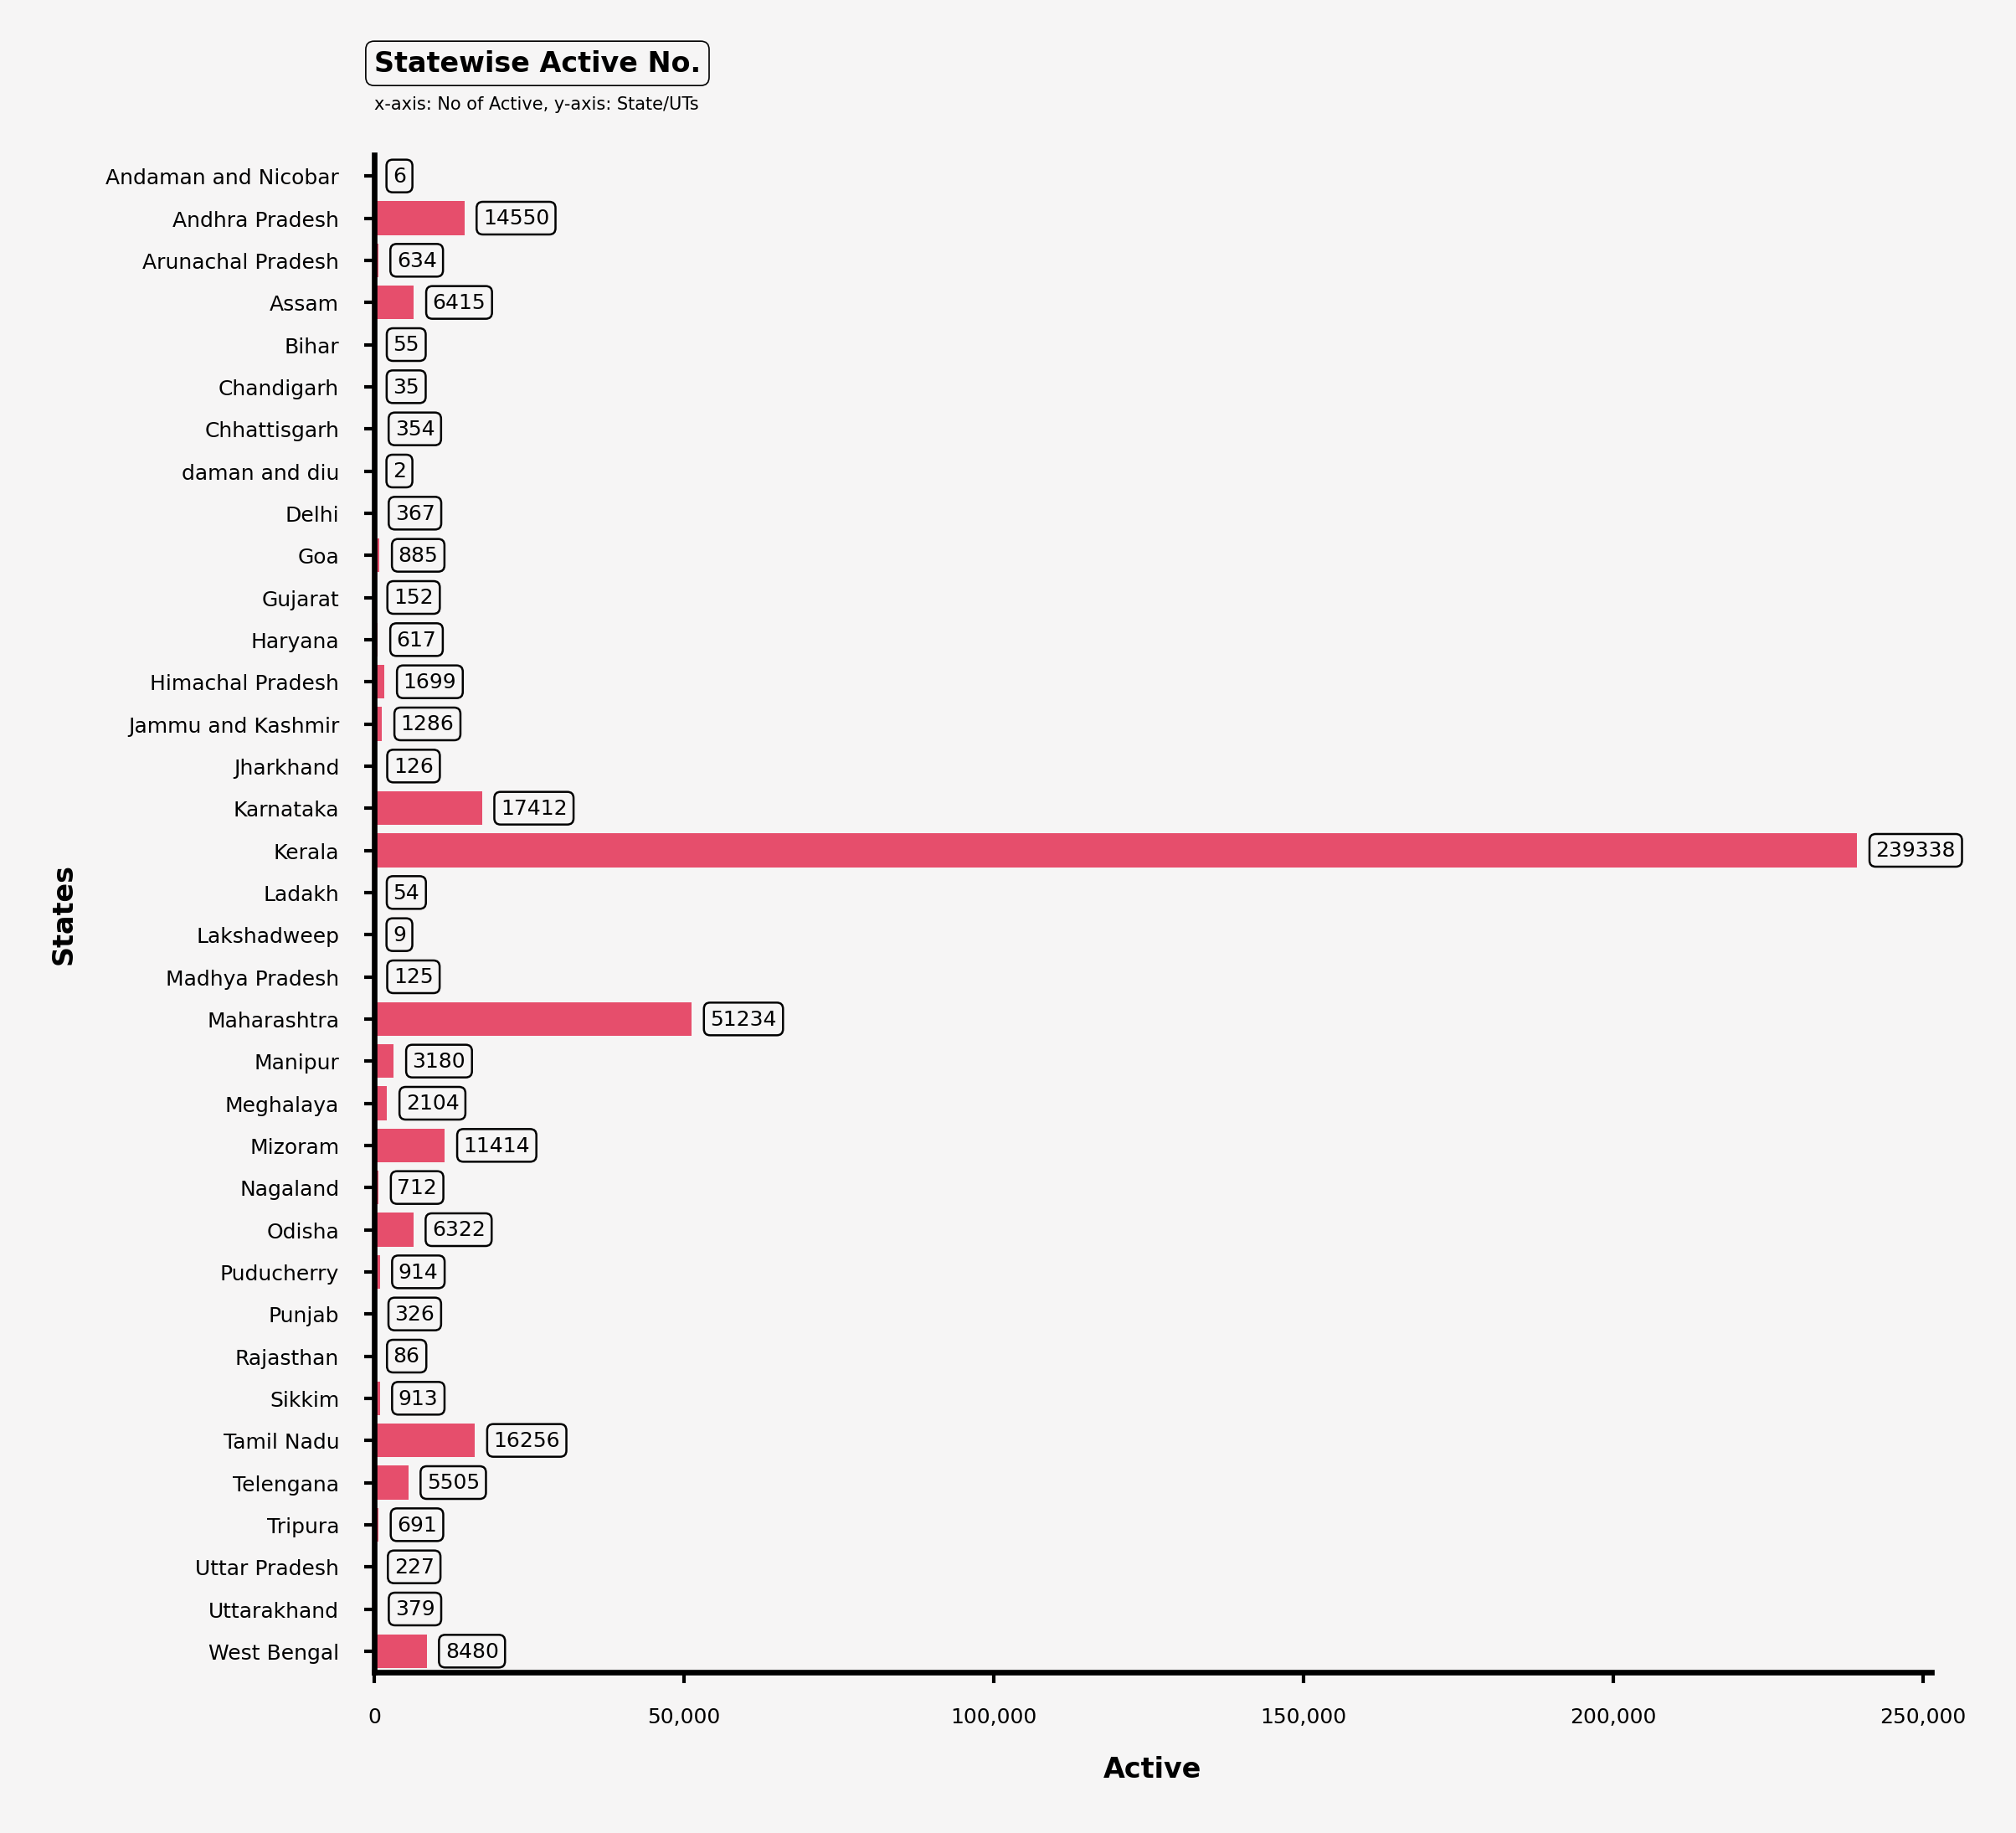

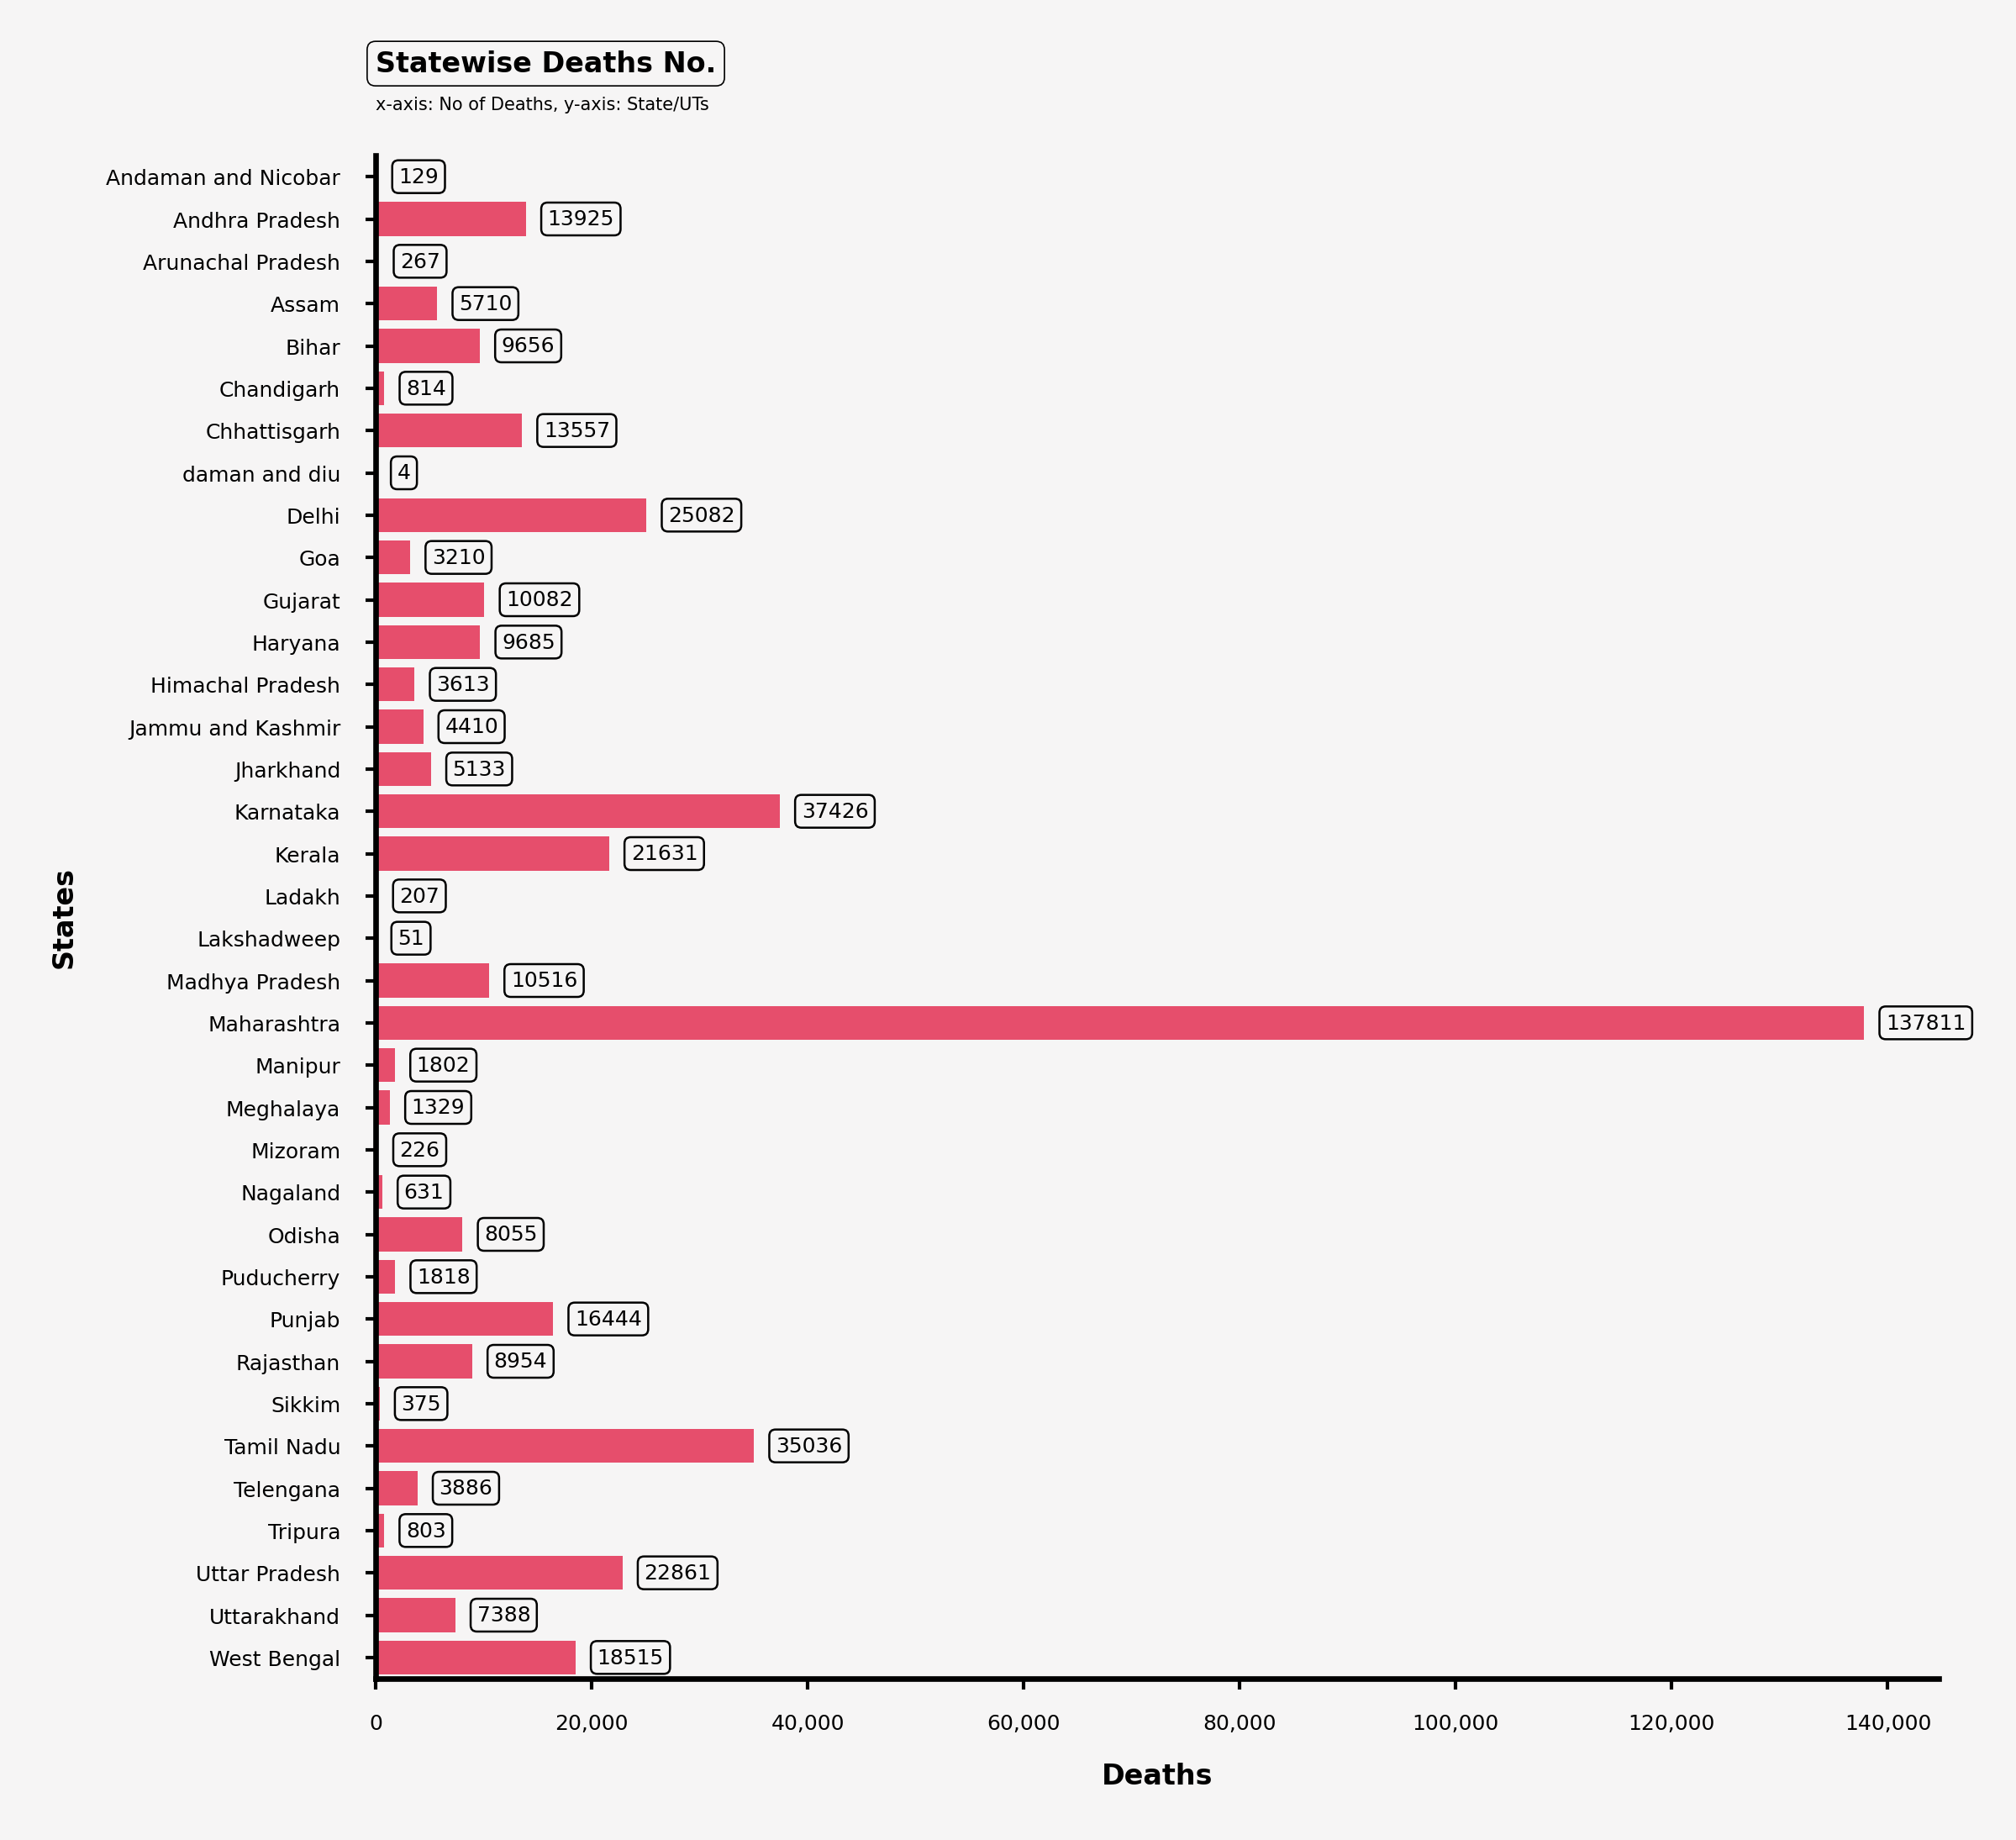

In [140]:
#barplot of all  int and float features in the dataframe with respective to states
plt.rcParams['figure.dpi'] = 600

part1 = ['Total Cases','Discharged']


for col in part1:
    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ff355d']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)

    ax0.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for p in ax0.patches:
        value = f'{p.get_width():.0f}'
        x = p.get_x() + p.get_width() + 70000
        y = p.get_y() + p.get_height() / 2 
        ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

part2 = ['Active','Deaths']    

for col in part2:
    if col != 'Deaths':
        fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
        gs = fig.add_gridspec(1, 1)
        gs.update(wspace=1.5, hspace=0.05)

        background_color = "#f6f5f5"
        sns.set_palette(['#ff355d']*120)
        ax0 = fig.add_subplot(gs[0, 0])

        for s in ["right", "top"]:
            ax0.spines[s].set_visible(False)
        ax0.set_facecolor(background_color)

        ax0.tick_params(labelsize=3, width=0.5, length=1.5)
        ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
        ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
        ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

        ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
        ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
        ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        for p in ax0.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 3000
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    else:
        fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
        gs = fig.add_gridspec(1, 1)
        gs.update(wspace=1.5, hspace=0.05)

        background_color = "#f6f5f5"
        sns.set_palette(['#ff355d']*120)
        ax0 = fig.add_subplot(gs[0, 0])

        for s in ["right", "top"]:
            ax0.spines[s].set_visible(False)
        ax0.set_facecolor(background_color)

        ax0.tick_params(labelsize=3, width=0.5, length=1.5)
        ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
        ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
        ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

        ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
        ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
        ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        for p in ax0.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2000
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


# **6.Bar Plot of the Ratio% Columns Values**
<a id = '6'> </a>
* [Jump to top](#0)

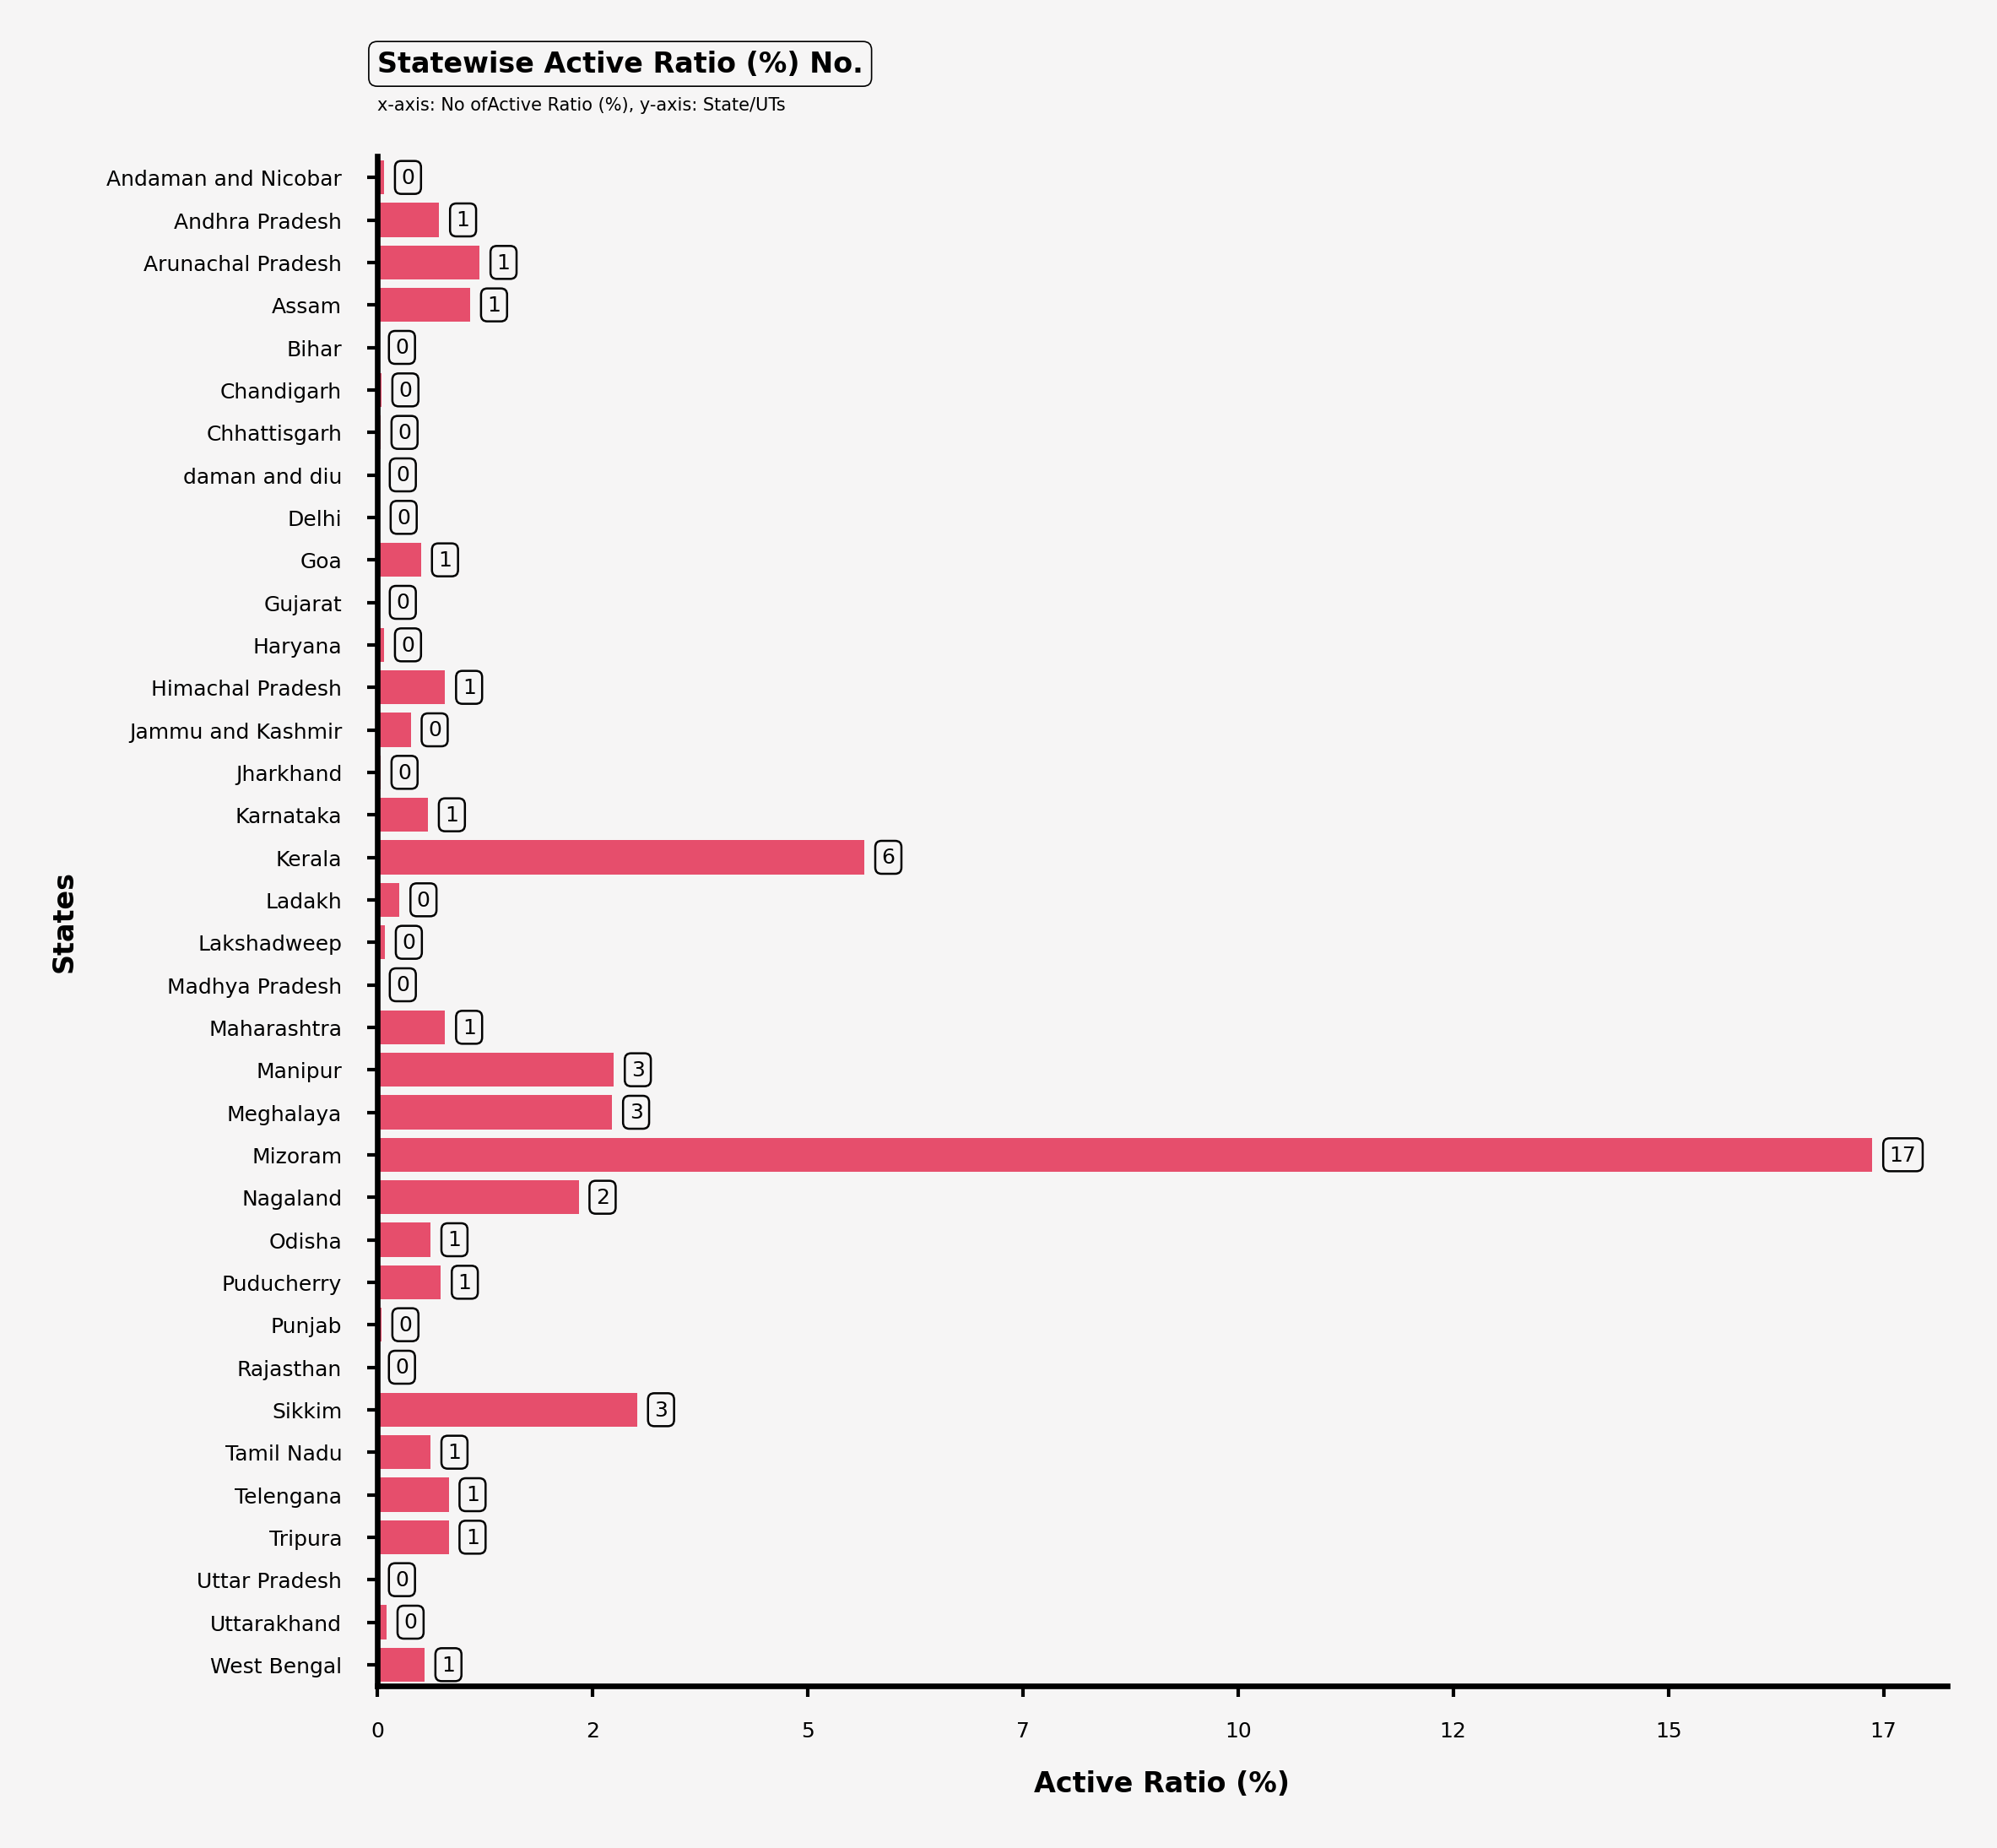

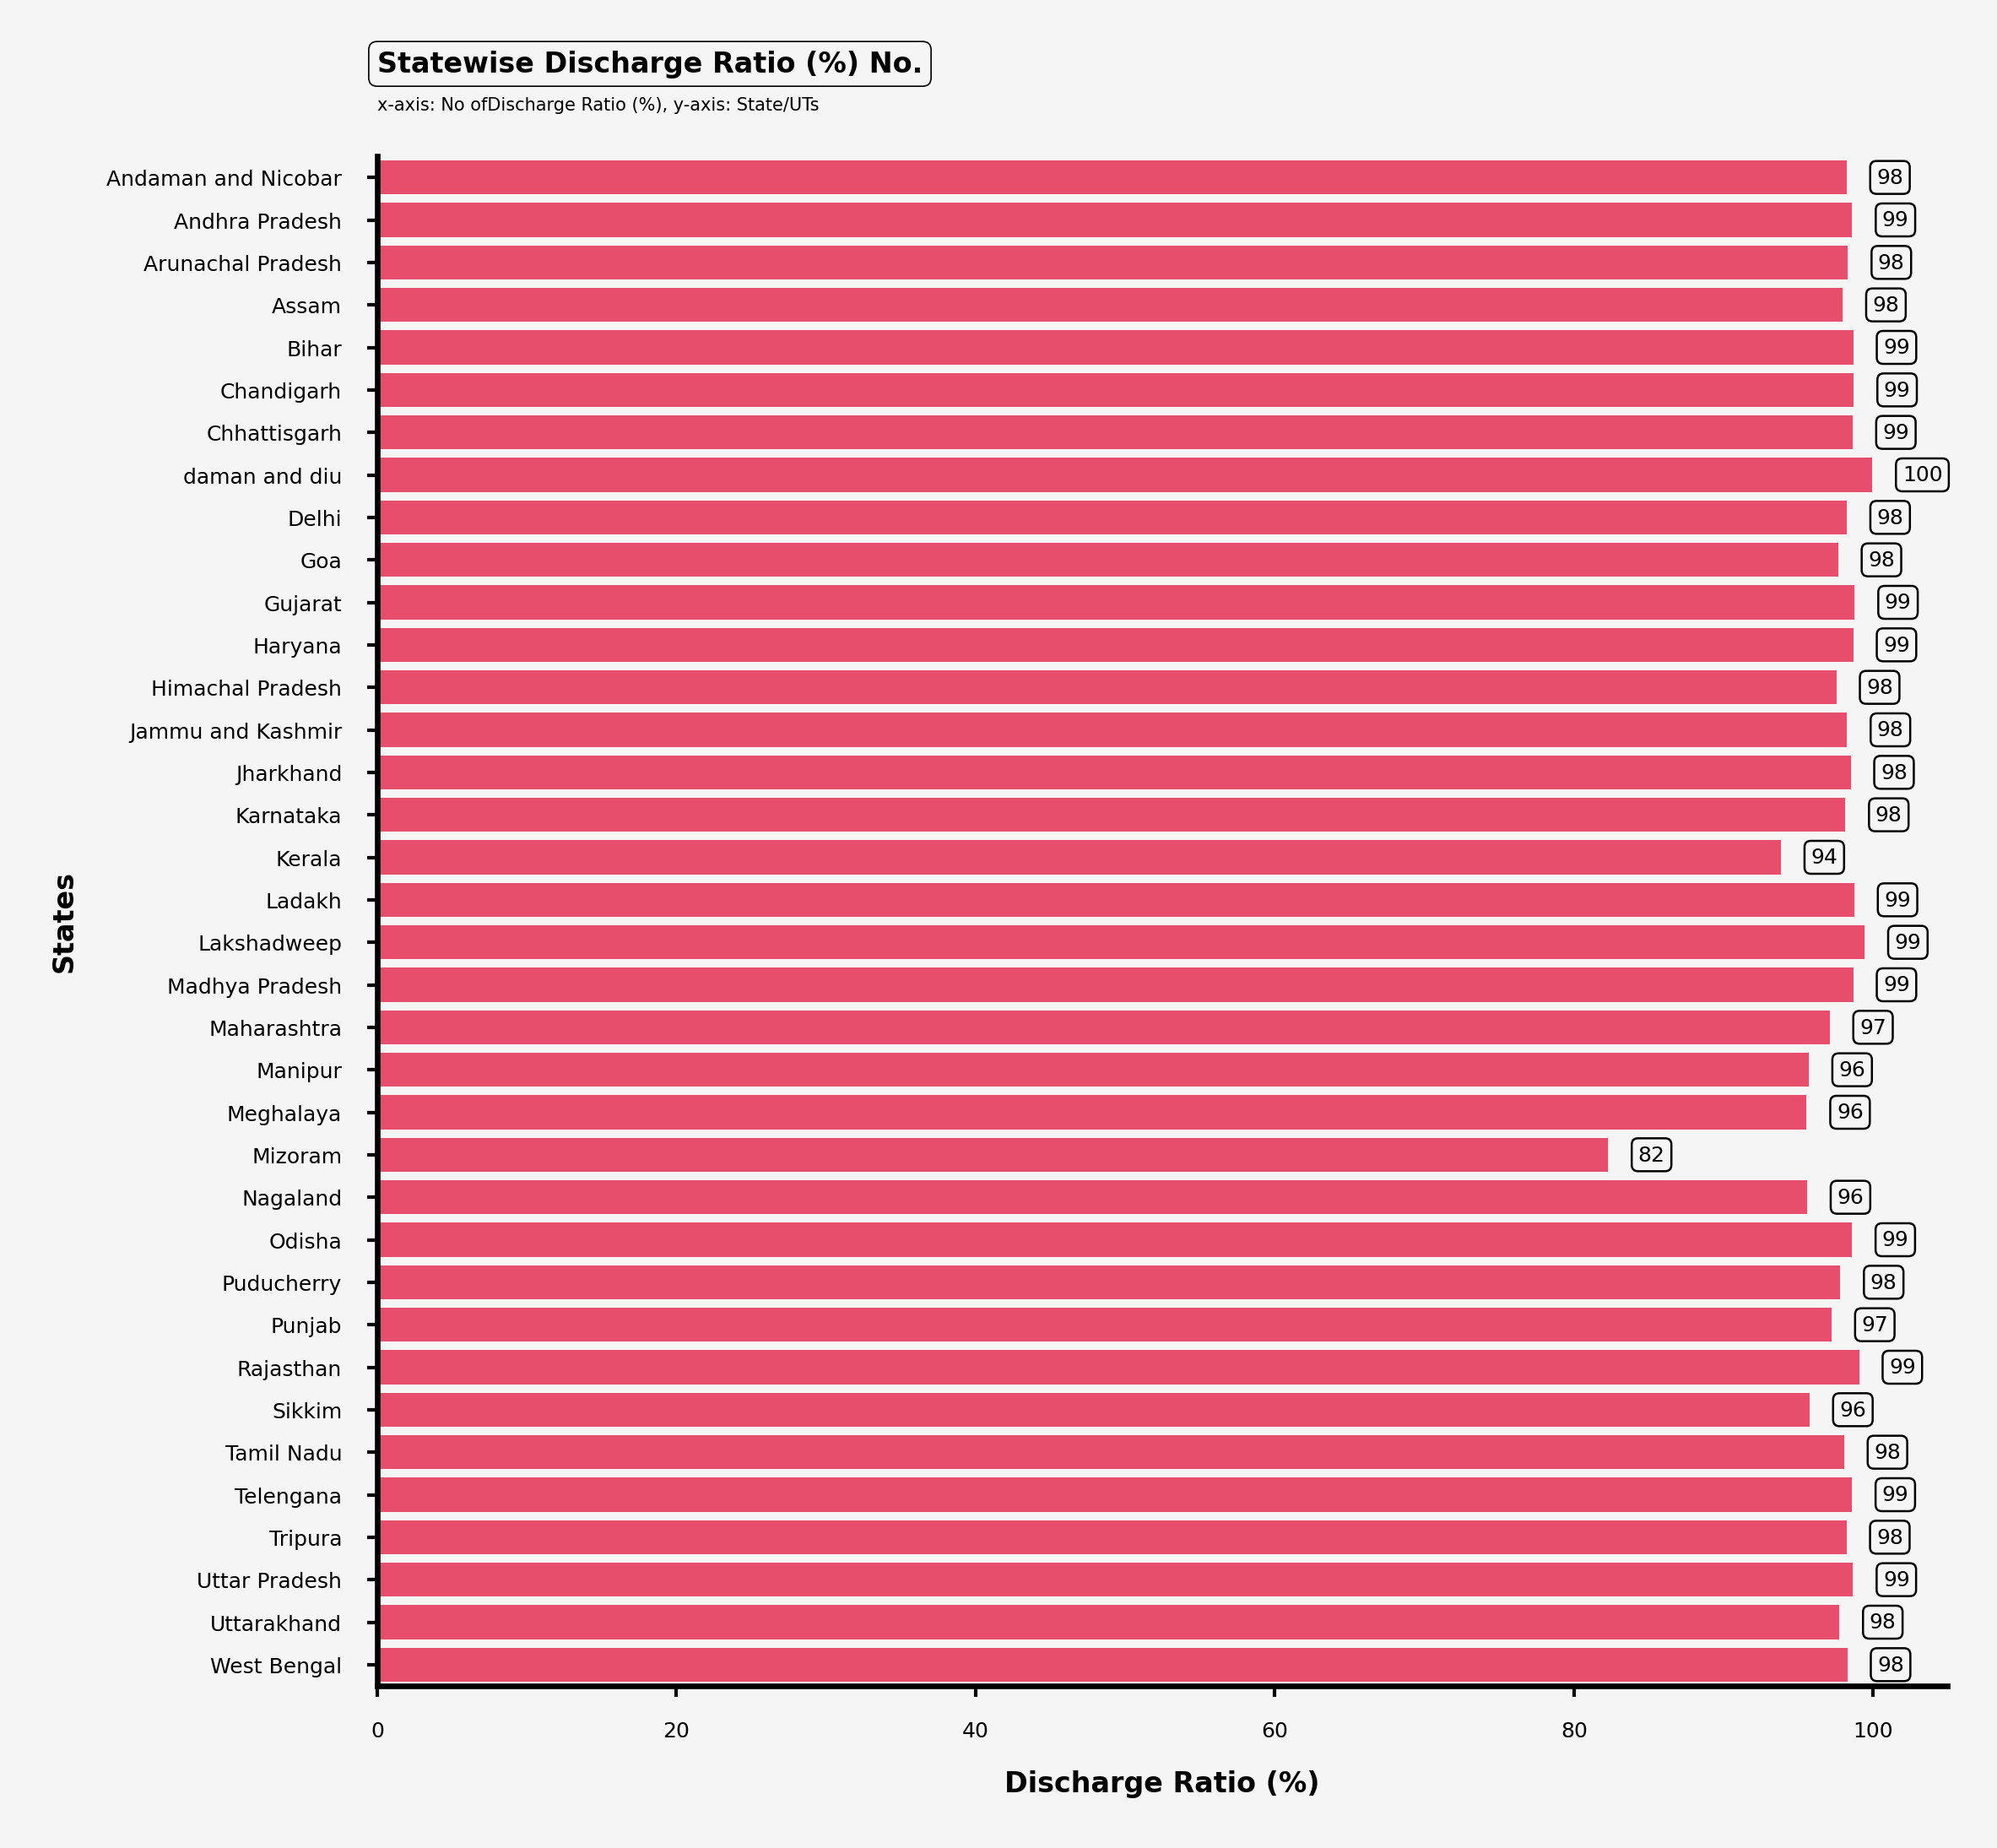

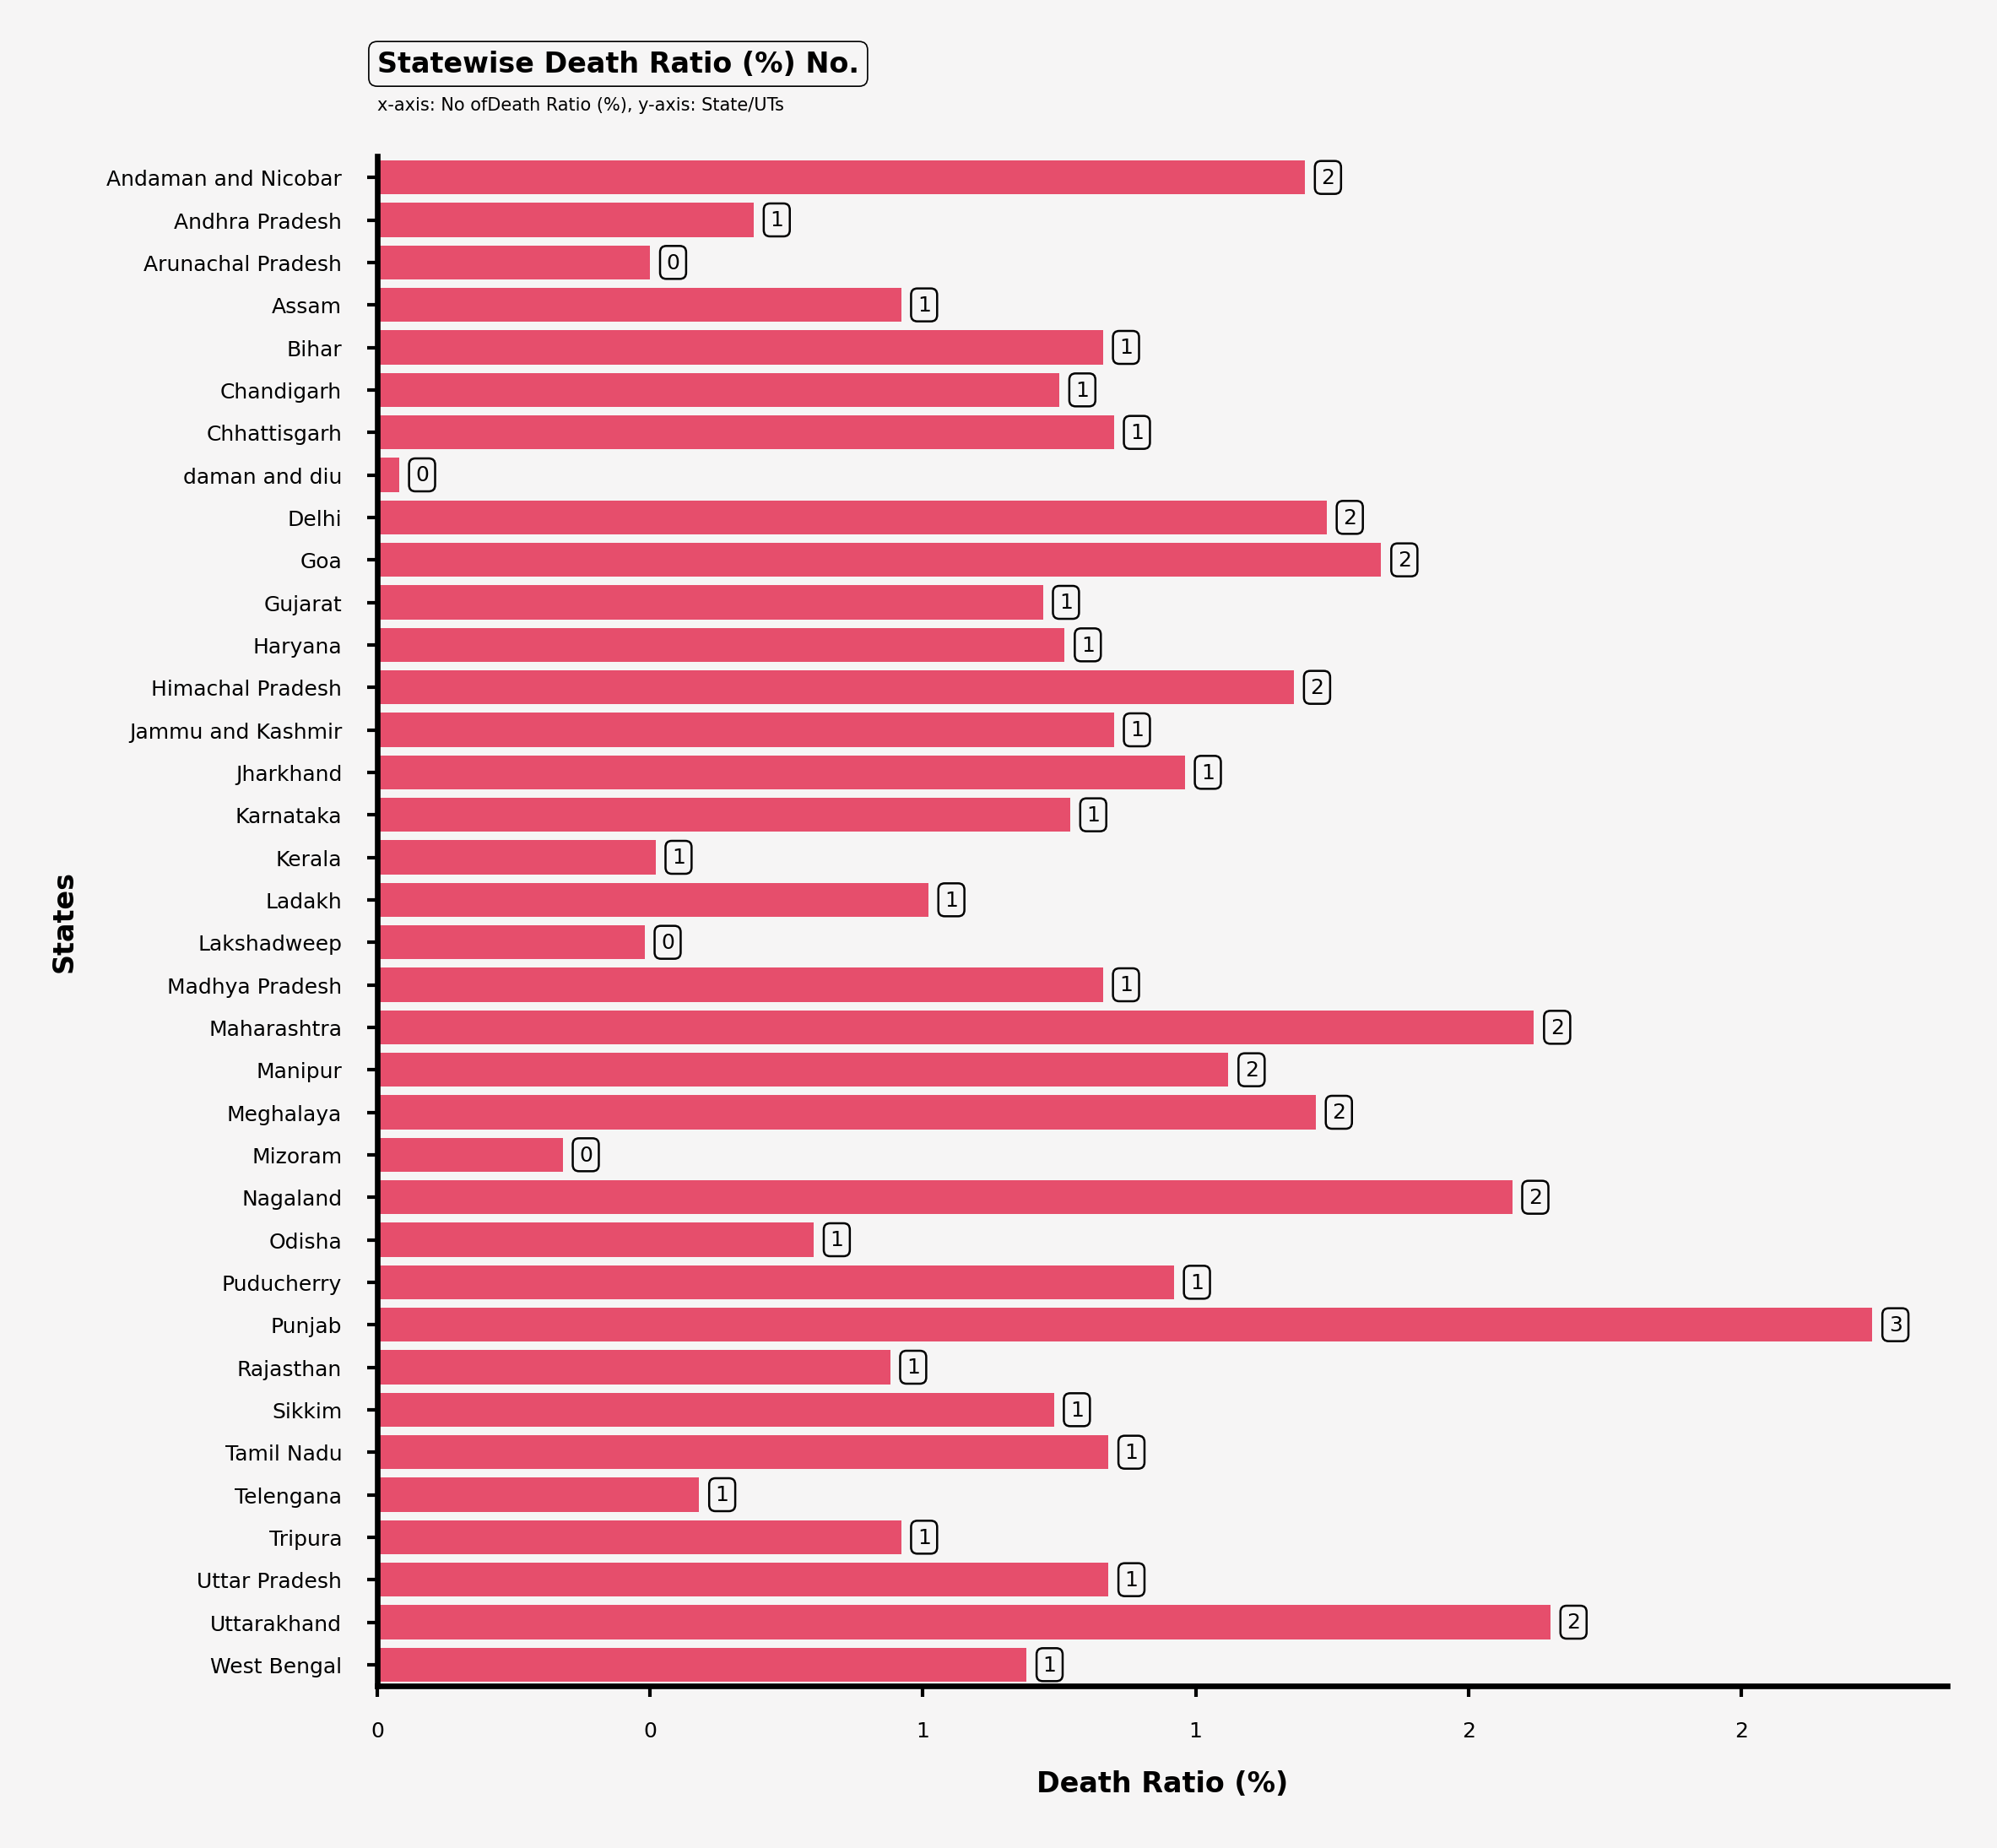

In [141]:
#barplot of all  int and float features in the dataframe with respective to states
plt.rcParams['figure.dpi'] = 600

one = ['Active Ratio (%)']
two = ['Discharge Ratio (%)']
three = ['Death Ratio (%)']

for col in one:

    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ff355d']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)

    ax0.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of{col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for p in ax0.patches:
        value = f'{p.get_width():.0f}'
        x = p.get_x() + p.get_width() + 0.2
        y = p.get_y() + p.get_height() / 2 
        ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

for col in two:

    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ff355d']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)

    ax0.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of{col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for p in ax0.patches:
        value = f'{p.get_width():.0f}'
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height() / 2 
        ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

for col in three:

    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ff355d']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)

    ax0.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of{col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for p in ax0.patches:
        value = f'{p.get_width():.0f}'
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height() / 2 
        ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


# **7. HeatMap of the Dataset**
<a id = '7'> </a>
* [Jump to top](#0)

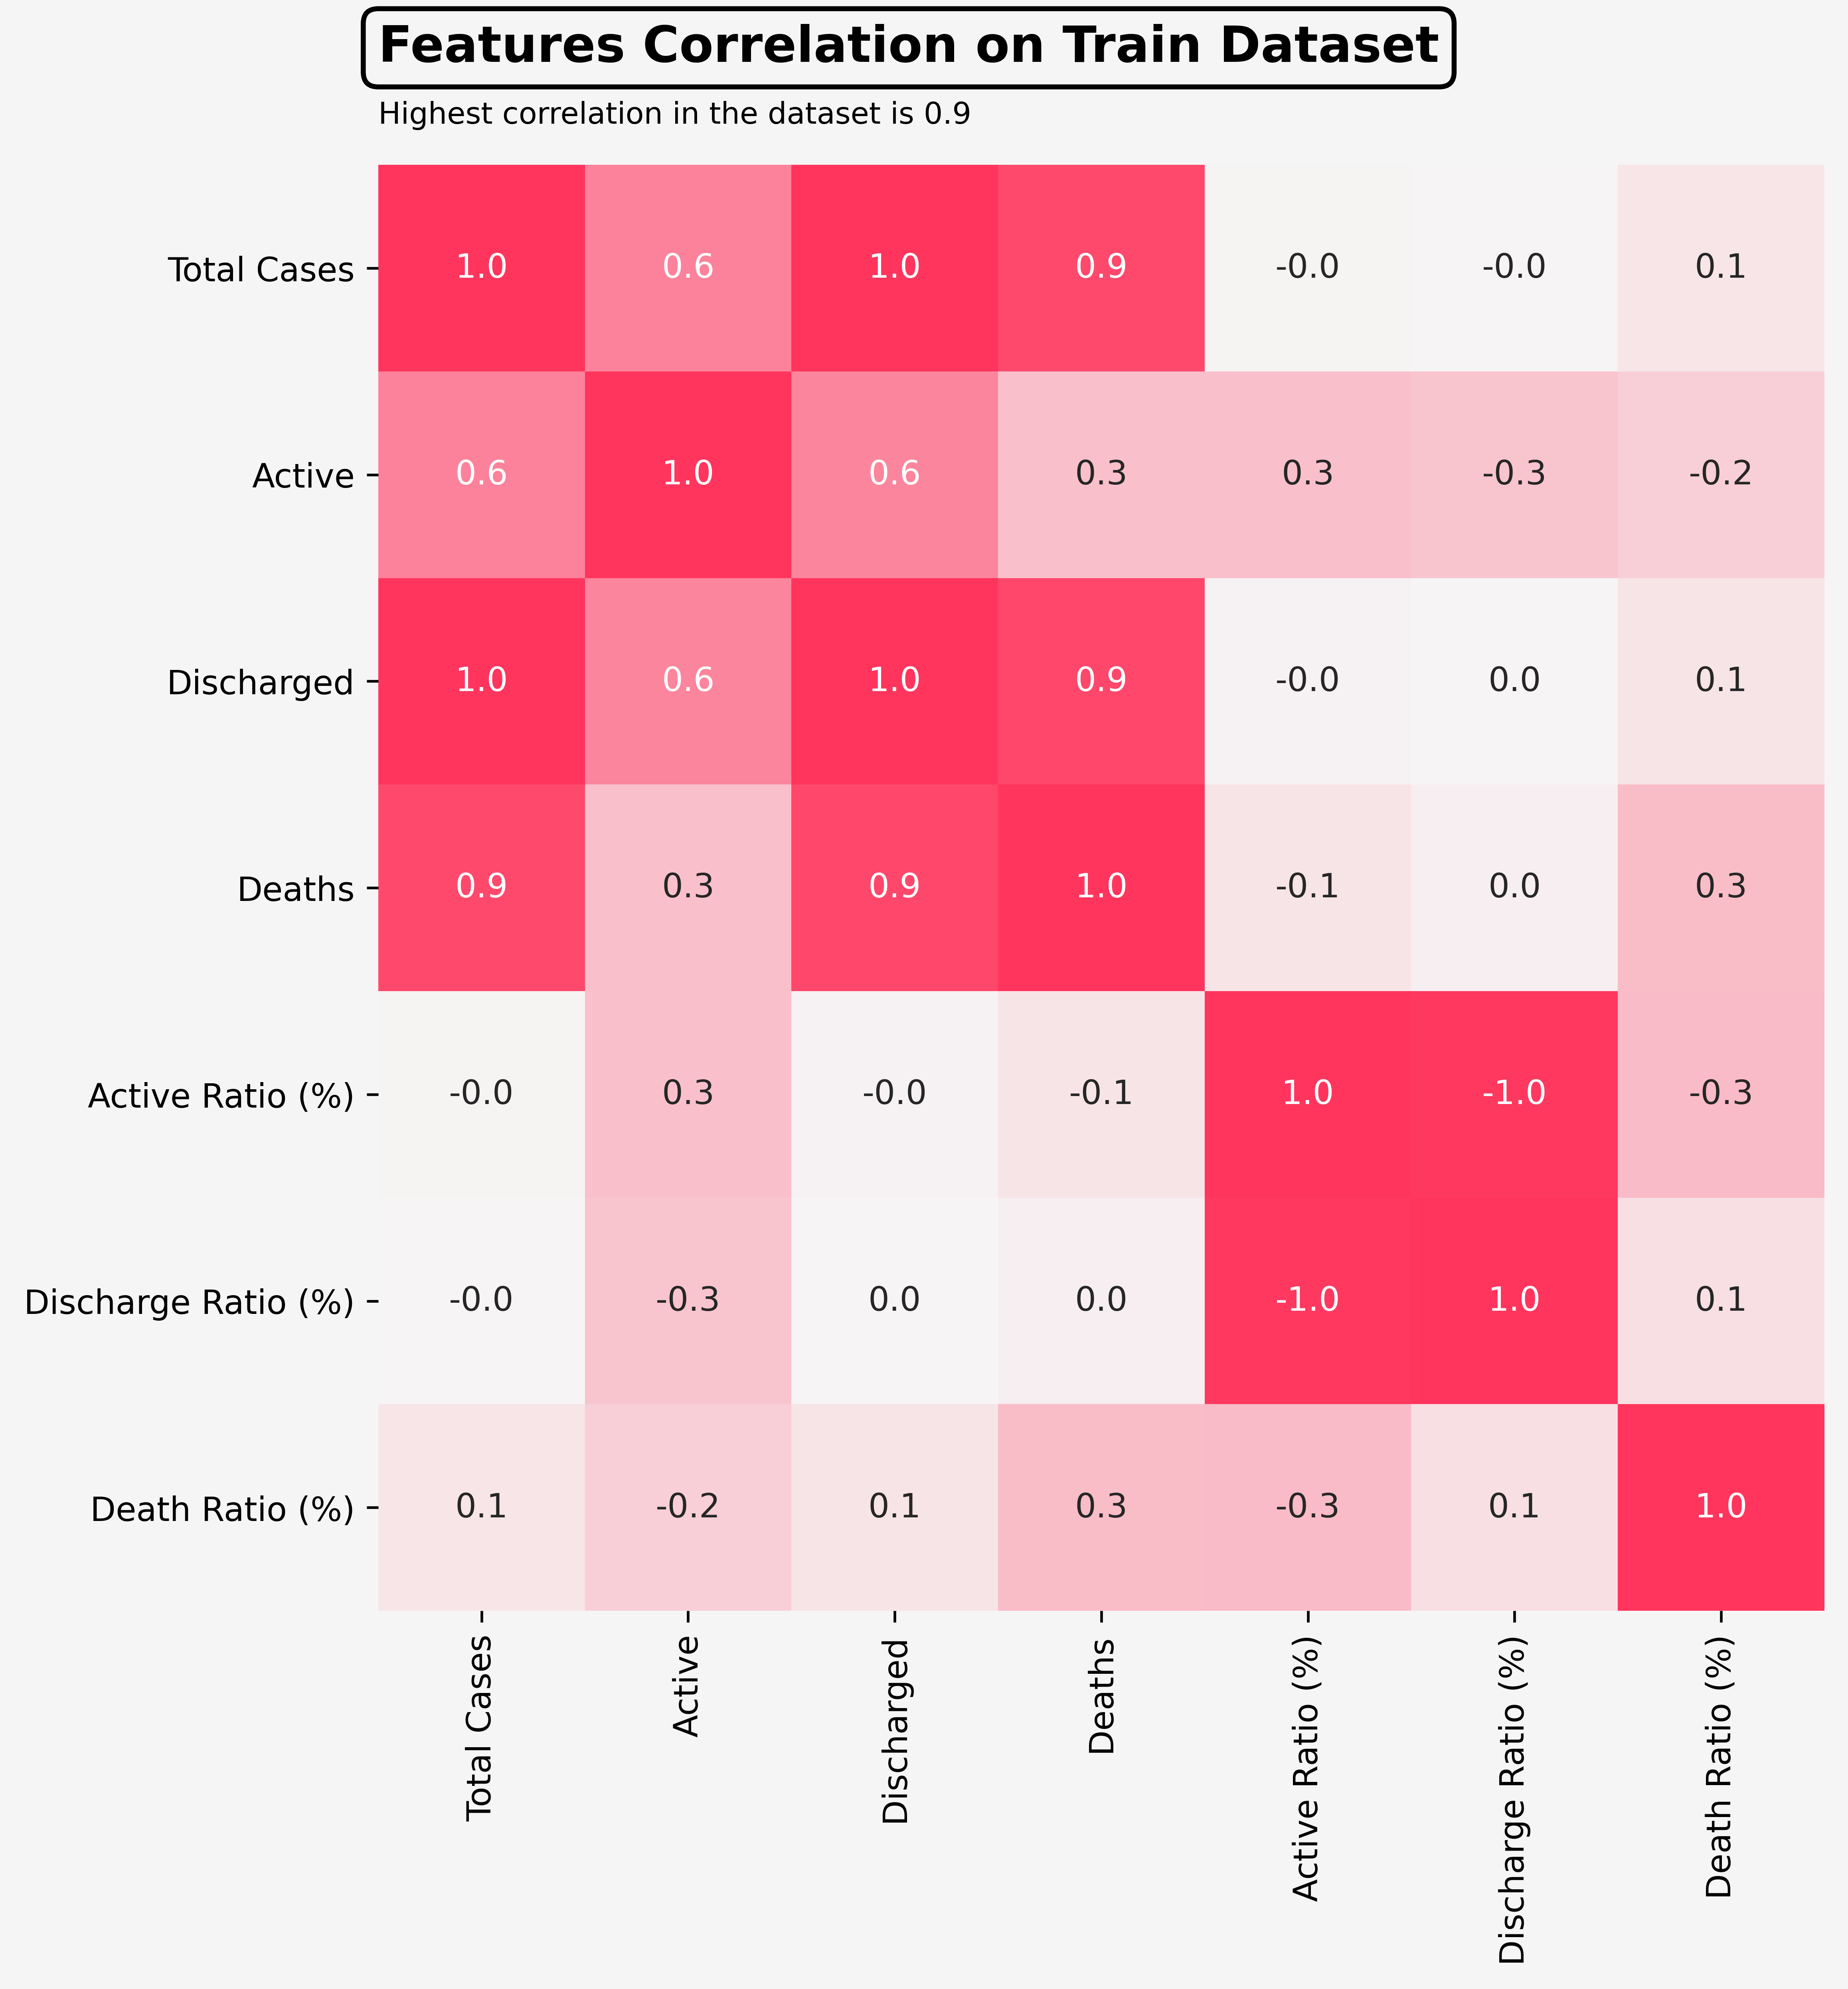

In [142]:
#heatmap of the dataset

background_color = "#f6f5f5"

fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#ff355d", "#f6f5f5","#ff355d"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(0, -0.5, 'Features Correlation on Train Dataset', fontsize=15, fontweight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
ax0.text(0, -0.2, 'Highest correlation in the dataset is 0.9', fontsize=9, fontweight='light')

sns.heatmap(df.corr(), ax=ax0, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1f')
plt.show()

# **8. Model training using pycaret**
<a id = '8'> </a>
* [Jump to top](#0)

In [143]:
df.drop(['Death Ratio (%)'],axis=1,inplace=True)

In [144]:
df.drop(['State/UTs'],axis=1,inplace=True)

leave_it_out = df.iloc[:1]
df = df.iloc[1:]

Deaths = leave_it_out.Deaths
leave_it_out.drop('Deaths',axis=1,inplace=True)

In [ ]:
!pip install pycaret
from pycaret.regression import *

In [146]:
env = setup(data=df,target='Deaths',train_size=0.99,normalize=True,normalize_method='robust',session_id = 69,silent=True
           )

print('''
Setting up the environment to start comparing models.

''')


Setting up the environment to start comparing models.




In [147]:
models = compare_models(sort='RMSE')

print('''
Our model evaluation metric for this dataset will be and
the tabel above is sorted according to RMSE score.

we got: HuberRegressor with parameters.

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

''')


Our model evaluation metric for this dataset will be and
the tabel above is sorted according to RMSE score.

we got: HuberRegressor with parameters.

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)




In [148]:
tuned_model = tune_model(models,fold=10,optimize='RMSE',early_stopping=True,early_stopping_max_iters=10,choose_better = True)

print('''
tuning the hyperparameters of the model compared above this cell.


''')


tuning the hyperparameters of the model compared above this cell.





In [149]:
plot_model(tuned_model,plot='parameter',fold=10,use_train_data=True)
print('Parameters of HuberRegressor')

Parameters
alpha              0.001
epsilon              1.7
fit_intercept       True
max_iter             100
tol                1e-05
warm_start         False

Parameters of HuberRegressor


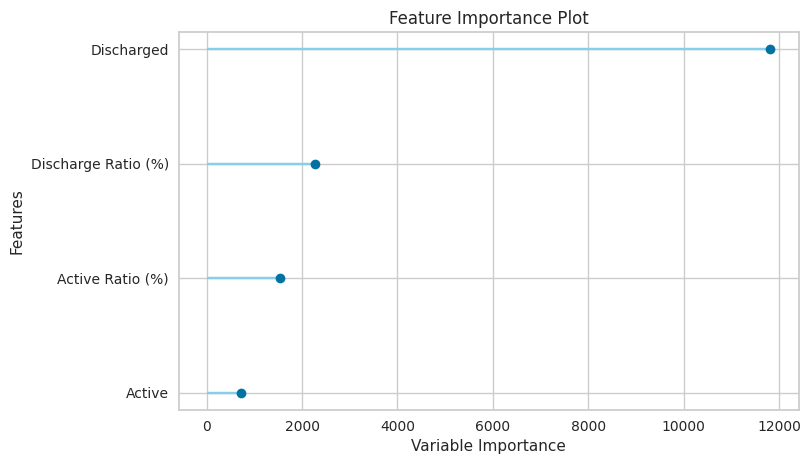

Feature Importance Plot of HuberRegressor:
As we can see Total Cases is highly correlated with target feature from heatmap
and feature importance plot




In [150]:
plot_model(tuned_model,plot='feature',fold=10,use_train_data=True)
print('''Feature Importance Plot of HuberRegressor:
As we can see Total Cases is highly correlated with target feature from heatmap
and feature importance plot

''')

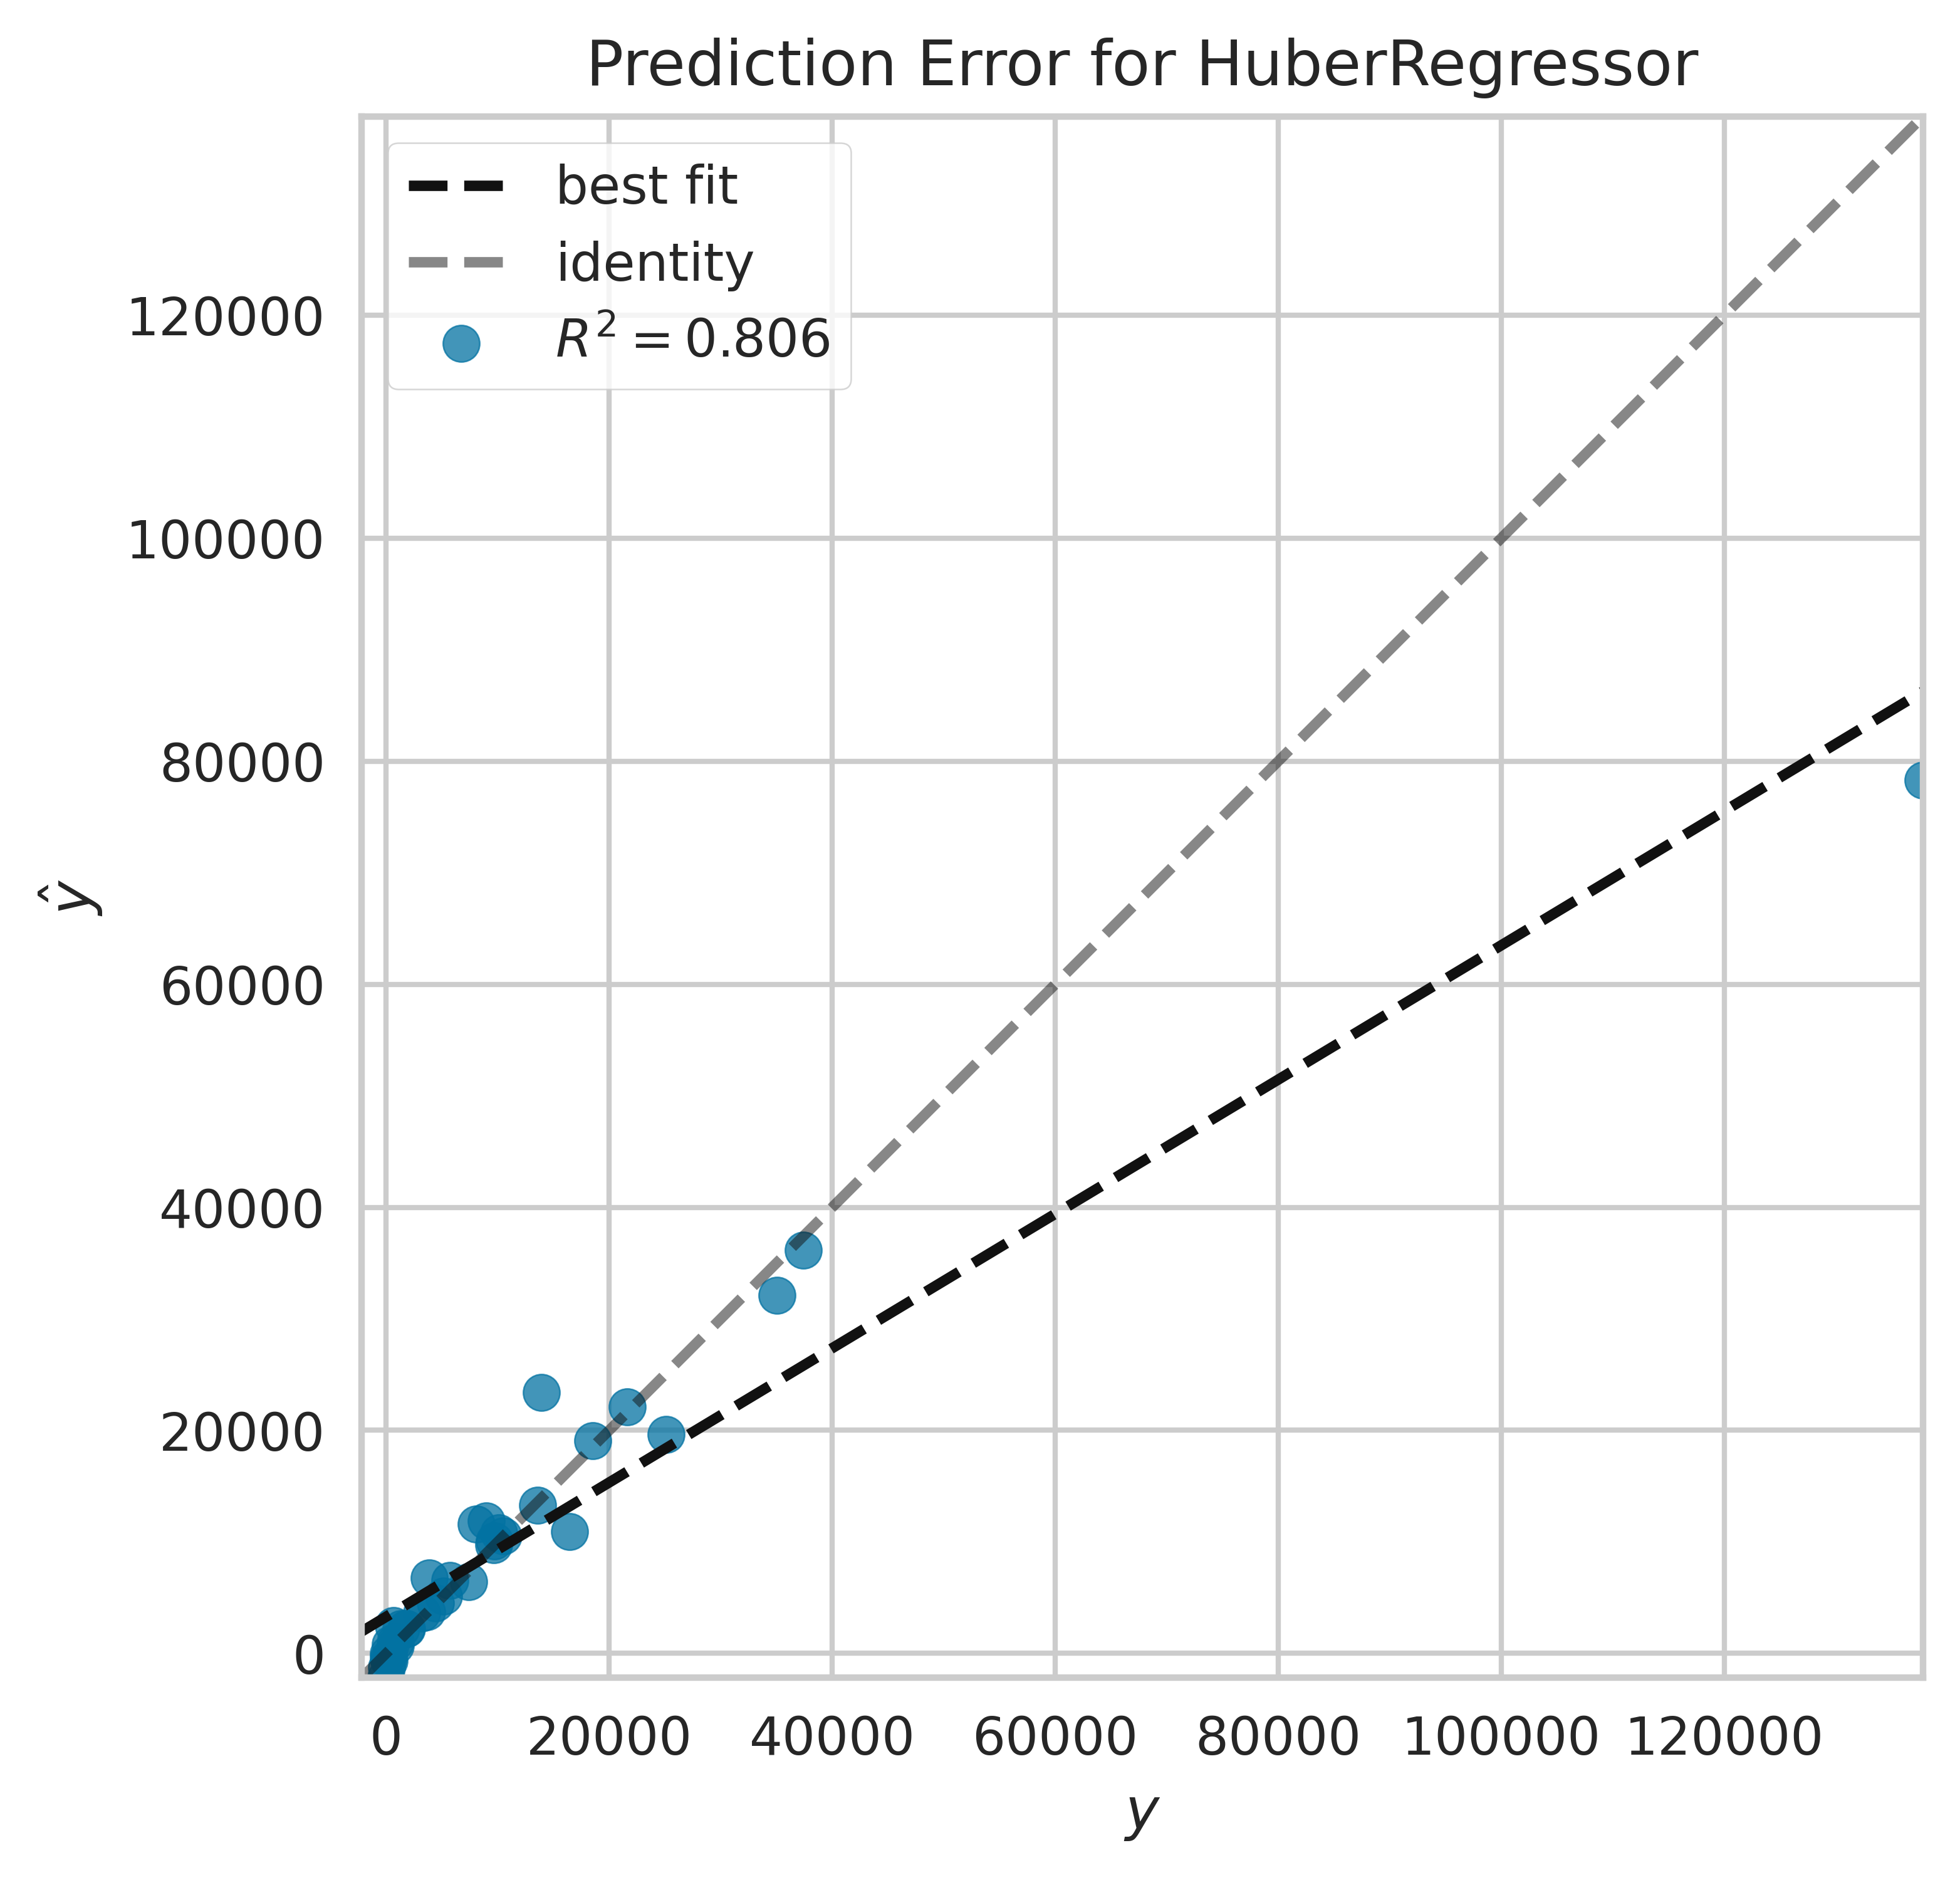

In [151]:
plot_model(tuned_model,plot='error',fold=10,use_train_data=True)

In [166]:
final_model = finalize_model(tuned_model)

print(final_model)

HuberRegressor(alpha=0.001, epsilon=1.7, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


# **9. Prediction of trained model on holdout data**

You can use pycaret to train complex models or to compare models
or else you can import particular model and train it.
Example given below with training and prediction on
holdout data.

<a id=9></a>
* [Jump to top](#0)

In [171]:
from sklearn.linear_model import HuberRegressor

y_train = df.Deaths
df.drop(['Deaths'],axis=1,inplace=True)

huberreg = HuberRegressor(alpha=0.001, epsilon=1.7, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

huberreg.fit(df,y_train)
Deaths_pred = huberreg.predict(leave_it_out)

print('Prediction of One Holdout row: ',f'\n\nPredicted Deaths: {int(Deaths_pred[0])}\nReal Nos.of Deaths Happend: {Deaths.values[0]}')

Total Cases  Active  Discharged  Active Ratio (%)  Discharge Ratio (%)
1       2022064   14550     1993589          0.720000            98.590000
2         53408     634       52507          1.190000            98.310000
3        592616    6415      580491          1.080000            97.950000
4        725759      55      716048          0.010000            98.660000
5         65122      35       64273          0.050000            98.700000
6       1004668     354      990757          0.040000            98.620000
7         10665       2       10659          0.020000            99.940000
8       1437991     367     1412542          0.030000            98.230000
9        174486     885      170391          0.510000            97.650000
10       825509     152      815275          0.020000            98.760000
11       770573     617      760271          0.080000            98.660000
12       214732    1699      209420          0.790000            97.530000
13       326033    1286      320337          0.390000            98.250000
14       347975     126      342716          0.040000            98.490000
15      2956137   17412     2901299          0.590000            98.140000
16      4227526  239338     3966557          5.660000            93.830000
17        20588      54       20327          0.260000            98.730000
18        10348       9       10288          0.090000            99.420000
19       792270     125      781629          0.020000            98.660000
20      6489800   51234     6300755          0.790000            97.090000
21       115584    3180      110602          2.750000            95.690000
22        77144    2104       73711          2.730000            95.550000
23        65696   11414       54056         17.370000            82.280000
24        30388     712       29045          2.340000            95.580000
25      1012167    6322      997790          0.620000            98.580000
26       124184     914      121452          0.740000            97.800000
27       600849     326      584079          0.050000            97.210000
28       954137      86      945097          0.010000            99.050000
29        30256     913       28968          3.020000            95.740000
30      2624234   16256     2572942          0.620000            98.050000
31       659844    5505      650453          0.830000            98.580000
32        83360     691       81866          0.830000            98.210000
33      1709457     227     1686369          0.010000            98.650000
34       343125     379      335358          0.110000            97.740000
35      1552576    8480     1525581          0.550000            98.260000

<div style="color:black; display:fill; border-radius:5px;background-color:#FF5733;font-size:220%;font-family:sans-serif;letter-spacing:0.5px"><h1>10. Important Note!!</h1></div>

<h3>Why this model so accurate??

Because there is a data leakage, as the Deaths columns is strongly correlated with total cases,Death ratio rate, dischared ratio rate / Discharged.

for more information on Data Leakage [click here](https://www.kaggle.com/alexisbcook/data-leakage).<br>
<div style="color:black; display:fill; border-radius:5px;background-color:#ffd514;font-size:220%;font-family:sans-serif;letter-spacing:0.5px">If you like the work please upvote (ᕗ ͡👁 ͜ʖ ͡👁)ᕗ</div>
</h3>


<a id = '10'> </a>
* [Jump to top](#0)